# Part II - Loan Dataset Explanatory From Prosper
## by Veronica Isiaho

## 1.0 Introduction
> The dataset that will be used for this project is available via [this url](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv). It entails loan details of customers entailing their loan status, credit grade, loan term etc.

## 1.1.0 Main Objective
>The main aim of this project is to identify what factors affect a loan’s
outcome status.

### 1.1.1 Specific Objectives
>1. To find out what affects the borrower’s APR
or interest rate.
>2. To identify if there are differences between
loans depending on how large the
original loan amount was.  



## 1.2.0 Data Understanding
To understand more about the dataset, I'll first load the relevant packages and thereafter load the data in order to find out more details about the data.

### 1.2.1 Loading Relevant Packages

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### 1.2.2 Loading the Data

In [41]:
# Load the cleaned data for further analysis
new_df = pd.read_csv('Cleaned_Data.csv')
new_df.head(3)

,CreditGrade,Term,LoanStatus,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,Recommendations,EmploymentDuration
0,C,36,Completed,Missing,5.950,0,CO,Other,Self-employed,2.000,True,True,2007-08-26 18:41:46.780000000,640.000,2001-10-11 00:00:00,5.000,4.000,12.000,1,24.000,2.000,472.000,4.000,0.000,11.000,0.810,0.000,0.170,"$25,000-49,999",3083.333,0,0,0.167
1,Missing,36,Current,A,7.000,2,CO,Professional,Employed,44.000,False,False,2014-02-27 08:28:14,680.000,1996-03-18 00:00:00,14.000,14.000,29.000,13,389.000,0.000,0.000,0.000,3989.000,29.000,1.000,2.000,0.180,"$50,000-74,999",6125.000,0,0,3.667
2,HR,36,Completed,Missing,5.950,0,GA,Other,Not available,96.072,False,True,2007-01-02 14:09:10.060000000,480.000,2002-07-27 00:00:00,10.317,9.260,3.000,0,0.000,1.000,984.507,0.000,17598.707,23.230,0.886,0.802,0.060,Not displayed,2083.333,0,0,8.006


In [3]:
# Set pd to max rows to print all the rows
pd.set_option('display.max_rows', 100)

# Use max_colwidth to display the entire column details
pd.set_option('display.max_colwidth', 4050)

# Load the data descriptions
data_desc = pd.read_csv('Prosper_Loan_Data_Variable_Definitions.csv')
data_desc

#data_desc.style.set_properties(**{'text-align': 'left'})

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the 'key' used in the listing object in the API."
1,ListingNumber,The number that uniquely identifies the listing to the public as displayed on the website.
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
4,Term,The length of the loan expressed in months.
5,LoanStatus,"The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket."
6,ClosedDate,"Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses."
7,BorrowerAPR,The Borrower's Annual Percentage Rate (APR) for the loan.
8,BorrowerRate,The Borrower's interest rate for this loan.
9,LenderYield,The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.


## 3.0 Univariate Exploration

> In this section, investigate distributions of individual variables. 

In [42]:
# Preview Columns for the cleaned dataframe
new_df.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'DateCreditPulled',
       'CreditScoreRangeLower', 'FirstRecordedCreditLine',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'RevolvingCreditBalance', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome',
       'LoanCurrentDaysDelinquent', 'Recommendations', 'EmploymentDuration'],
      dtype='object')

In [43]:
# get order of bars by frequency
type_counts = new_df['LoanStatus'].value_counts()
print(type_counts)
type_order = type_counts.index   
print(type_order)

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64
Index(['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)', 'Cancelled'],
      dtype='object')


### 1. What is the value count for the unique values in Categorical Features?
> Assessing the data and understanding the number of unique values each categorical feature is great. This will help in finding out how the features are.

#### a.  Finding the proportion of Term 

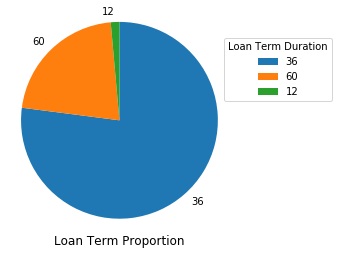

In [44]:
# Find the proportion of the term variable
# Gte the value counts of Term, divide by the sum then multiply by 100 
sorted_counts = new_df['Term'].value_counts()/ new_df['Term'].value_counts().sum() * 100

total = new_df['Term'].value_counts().sum()
# Plot a pie chart displaying the Term proportion
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False)
plt.title('Loan Term Proportion',y=-0.1) # , pad=-32
plt.legend(bbox_to_anchor=(1.5,0.9),loc="upper right",title ='Loan Term Duration');
plt.axis('square');

**Observation**
> From the pie chart above, the loan term duration of 36 months had the highest proportion with a value of 77.041 percent followed by 60 months duration with a proportion of 21.543% and finally the 12 month loan duration with a proportion of 1,417%.

> This implies that most creditors took a loan with a duration of 36 months.

In [45]:
# Print the loan duration
sorted_counts

36   77.041
60   21.543
12    1.417
Name: Term, dtype: float64

**Note**
> To be able to get the value counts of the unique variables, I'll select the categorical variables and then write a function that will plot the bar charts. 

In [46]:
# Select the categorical variables only
cat_features = new_df.select_dtypes(exclude = np.number).columns

# Print the categorical variables for ease of reference
print('\033[1m The categorical variables are as listed below:\033[0m \n\n{}'.format(cat_features))

 The categorical variables are as listed below: 

Index(['CreditGrade', 'LoanStatus', 'ProsperRating (Alpha)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'DateCreditPulled', 'FirstRecordedCreditLine',
       'IncomeRange'],
      dtype='object')


**Note**
> I'll use the above listed variables to plot bar graphs. But first, I'll create a function for ploting bar graphs.

In [47]:
# Create a bar graph function using lambda

plot_bar = lambda dataframe, column : dataframe.groupby([column]).size().plot(kind='bar',
                                                                             color=sb.color_palette()[0],
                                                                             title = 'Count Plot for {}'.format(column))

In [49]:
# Select dataframe without Missing value in the CreditGrade column
new_df_copy = new_df[new_df['CreditGrade'] != 'Missing']

# Confirm the unique values remaining in the CreditGrade column
new_df_copy['CreditGrade'].unique()

array(['C', 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [50]:
def count_info(data, column):
    index = data[column].value_counts()#.index
    values = data[column].value_counts().values
    max_ = values.max()
    print('\033[1mObservation: \033[0m')
    print('The unique value count for {} are as listed below: With the highest count of {}.\n{}'.format(column,max_, index))

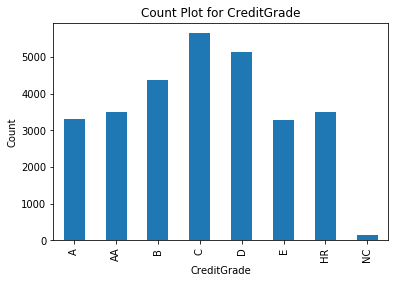

In [51]:
# Plot the bar plot of Credit Grade column without the missing values
plt.ylabel('Count')
plot_bar(new_df_copy, 'CreditGrade');

In [52]:
# Observation from the ploted bar graph above
count_info(new_df_copy, 'CreditGrade');

Observation: 
The unique value count for CreditGrade are as listed below: With the highest count of 5649.
C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64


In [53]:
# Write a function that will display the bar chart and the value counts information
def bar_brief(column):
    plt.ylabel('Count')
    plot_bar(new_df, column)
    count_info(new_df, column);

Observation: 
The unique value count for IncomeRange are as listed below: With the highest count of 32192.
$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64


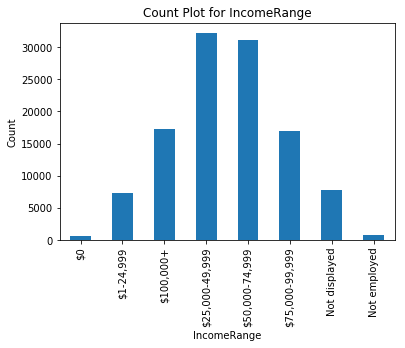

In [54]:
# Display the bar chart and the counts
bar_brief('IncomeRange')

In [55]:
# Observation
count_info(new_df,'IncomeRange');

Observation: 
The unique value count for IncomeRange are as listed below: With the highest count of 32192.
$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64


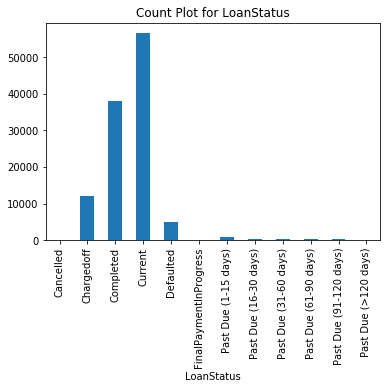

In [56]:
# Finfd the unique value counts for loan status 
plot_bar(new_df,'LoanStatus');

In [57]:
# Observation
count_info(new_df,'LoanStatus');

Observation: 
The unique value count for LoanStatus are as listed below: With the highest count of 56576.
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64


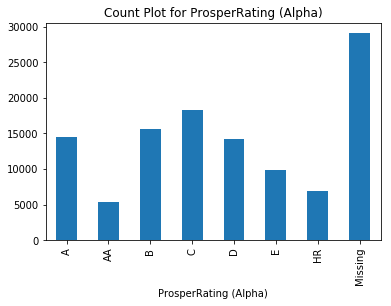

In [58]:
# Value counts for Prosper Rating
plot_bar(new_df, 'ProsperRating (Alpha)');

In [59]:
# Plot without the missing values
rating_df = new_df[new_df['ProsperRating (Alpha)'] != 'Missing']

# # Confirm the changes have been made
rating_df['ProsperRating (Alpha)'].unique()

array(['A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

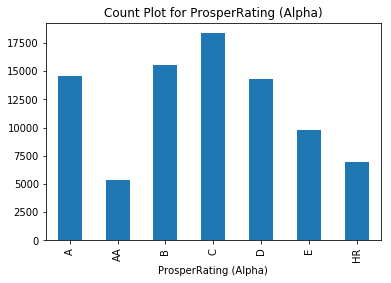

In [60]:
# Plot the ProsperRating (Alpha) bar chart without the missing values
plot_bar(rating_df, 'ProsperRating (Alpha)');

In [61]:
# Observation
count_info(rating_df, 'ProsperRating (Alpha)')

Observation: 
The unique value count for ProsperRating (Alpha) are as listed below: With the highest count of 18345.
C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64


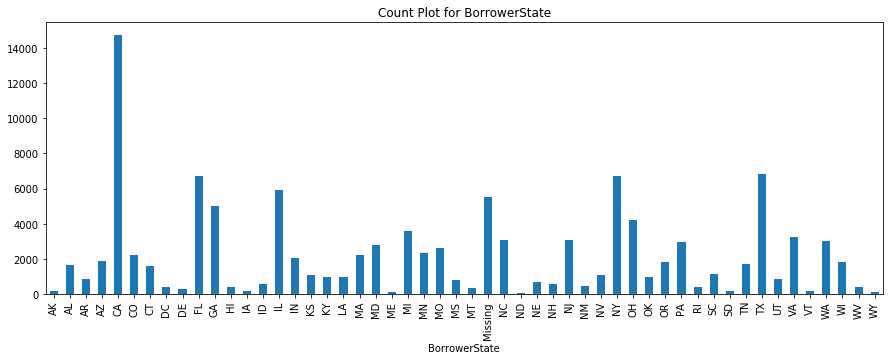

In [62]:
# Plot a bar graph for the Borrowers State
plt.figure(figsize=[15,5]), plot_bar(new_df, 'BorrowerState');

In [63]:
# Observation
count_info(new_df, 'BorrowerState')

Observation: 
The unique value count for BorrowerState are as listed below: With the highest count of 14717.
CA         14717
TX          6842
NY          6729
FL          6720
IL          5921
Missing     5515
GA          5008
OH          4197
MI          3593
VA          3278
NJ          3097
NC          3084
WA          3048
PA          2972
MD          2821
MO          2615
MN          2318
MA          2242
CO          2210
IN          2078
AZ          1901
WI          1842
OR          1817
TN          1737
AL          1679
CT          1627
SC          1122
NV          1090
KS          1062
KY           983
OK           971
LA           954
UT           877
AR           855
MS           787
NE           674
ID           599
NH           551
NM           472
RI           435
HI           409
WV           391
DC           382
MT           330
DE           300
VT           207
AK           200
SD           189
IA           186
WY           150
ME           101
ND            52
Name: B

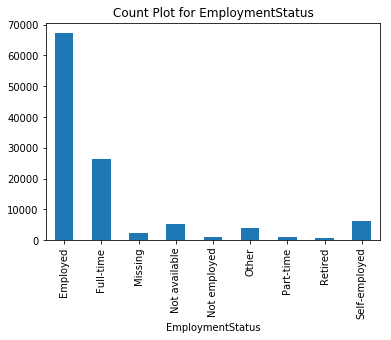

In [64]:
# Employment status bar plot
plot_bar(new_df, 'EmploymentStatus');

In [65]:
# Observation
count_info(new_df, 'EmploymentStatus')

Observation: 
The unique value count for EmploymentStatus are as listed below: With the highest count of 67322.
Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Missing           2255
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64


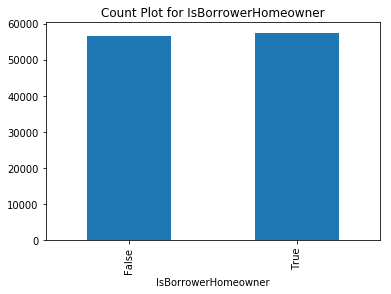

In [66]:
# Bar plot for Is Borrower Homeowner
plot_bar(new_df, 'IsBorrowerHomeowner');

In [67]:
# Observation
count_info(new_df, 'IsBorrowerHomeowner')

Observation: 
The unique value count for IsBorrowerHomeowner are as listed below: With the highest count of 57478.
True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64


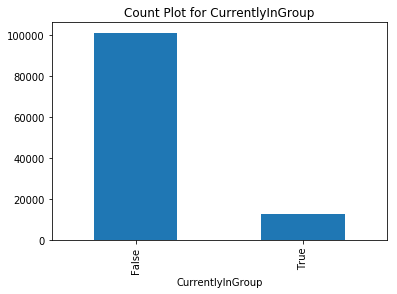

In [68]:
# Bar plot for CurrentlyInGroup
plot_bar(new_df, 'CurrentlyInGroup');

In [69]:
# Observation
count_info(new_df, 'CurrentlyInGroup')

Observation: 
The unique value count for CurrentlyInGroup are as listed below: With the highest count of 101218.
False    101218
True      12719
Name: CurrentlyInGroup, dtype: int64


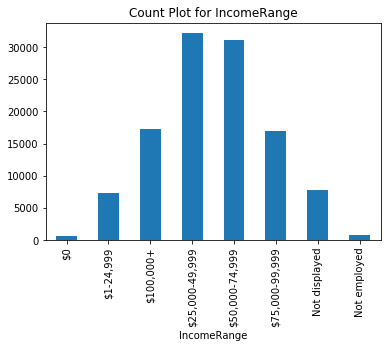

In [70]:
# Bar Plot for income Range
plot_bar(new_df, 'IncomeRange');

In [71]:
# Observation
count_info(new_df, 'IncomeRange')

Observation: 
The unique value count for IncomeRange are as listed below: With the highest count of 32192.
$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64


> The highest count of debtors (32192) who took loans had a salary range of 25,000 to 49,999 dollars followed by 31,050 who were earning a salary of between 50,000 to 74,999 dollars.

### Plotting a Bar Chart for Categorical and Numerical Variables

In [73]:
# Previewing the categorical features dataframe
new_df[cat_features].head(3)

,CreditGrade,LoanStatus,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,FirstRecordedCreditLine,IncomeRange
0,C,Completed,Missing,CO,Other,Self-employed,True,True,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999"
1,Missing,Current,A,CO,Professional,Employed,False,False,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999"
2,HR,Completed,Missing,GA,Other,Not available,False,True,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed


> For ease of plotting, I'll select the numerical and categorical features into different dataframes.

In [74]:
# Select the nimber of numerical features
numerical_features = new_df.select_dtypes('number').columns
numerical_features

Index(['Term', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'RevolvingCreditBalance', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'Recommendations', 'EmploymentDuration'],
      dtype='object')

**Note:**
> I'll add the Loan Status to the numerical dataframe so that I'll be able to plot the numerical features against the categorical feature which is loans status and it is also the main variable for analysis. This will help to have an insight on how the other independent variables realte to the dependent variable which is the loan status.

In [75]:
# Add the loan statu column to the numerical features
df_1 = new_df[numerical_features].iloc[:, :5]
df_1['LoanStatus'] = new_df['LoanStatus']
df_1.head()

,Term,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,LoanStatus
0,36,5.950,0,2.000,640.000,Completed
1,36,7.000,2,44.000,680.000,Current
2,36,5.950,0,96.072,480.000,Completed
3,36,9.000,16,113.000,800.000,Current
4,36,4.000,2,44.000,680.000,Current


In [76]:
# Find the mean for the first grouped numerical features
df_2 = df_1.groupby(['LoanStatus']).mean()
df_2

,Term,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower
LoanStatus,,,,,
Cancelled,36.000,5.950,0.200,82.857,613.114
Chargedoff,38.029,5.701,2.469,81.982,649.063
Completed,36.614,6.253,2.537,83.021,685.587
Current,44.512,5.838,3.084,108.782,698.740
Defaulted,36.842,5.884,1.279,85.190,622.563
FinalPaymentInProgress,39.278,5.751,4.156,97.551,700.390
Past Due (1-15 days),43.355,5.042,3.900,100.258,687.568
Past Due (16-30 days),43.698,4.970,4.200,91.234,682.189
Past Due (31-60 days),44.066,5.110,4.331,93.504,691.460


### Create a Function for Plotting a Grouped Bar Graph

In [77]:
# Create a Function that will plot a Grouped Bar Graph
def grouped_bar(dataframe):
    """This function will return a grouped bar graph.
    Arguments = DataFrame: pd.DataFrame
    INPUTS: Plotting a Bar Graph on the DataFrame
    OUTPUT: Grouped Bar Graph"""
    # Set label on y axis
    return dataframe.plot(kind='bar', figsize=(20,6), width=0.8
                         ), plt.ylabel('Average',  fontsize=15
                                      ), plt.title('Loan Status Averages '
                                                   'Vs Numerical Features', weight='bold', fontsize=15
                                                   ), plt.xlabel('Loan Status', fontsize=15);
                                                                
                                                                 

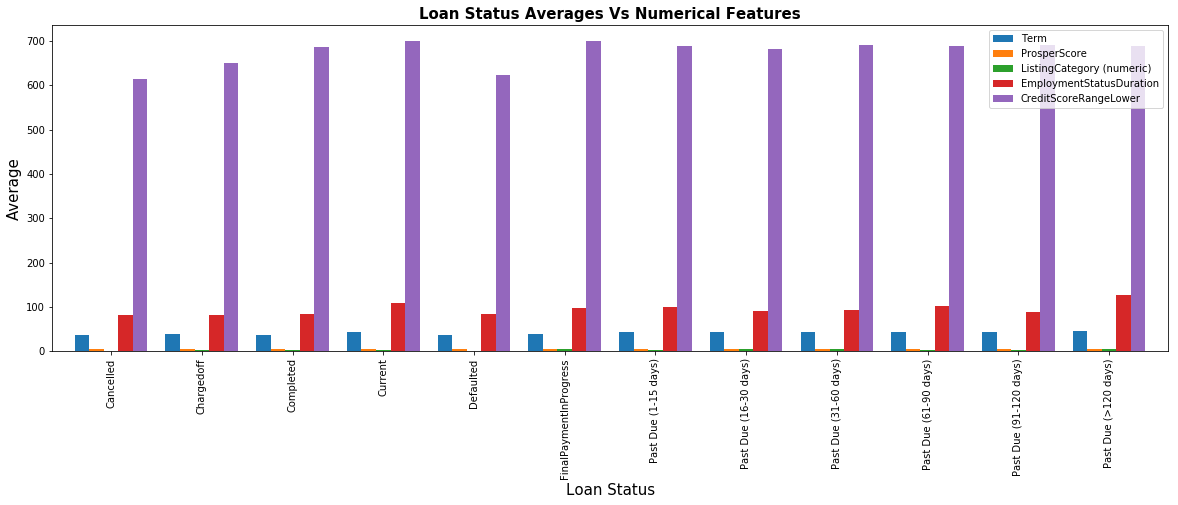

In [78]:
# Plot bar graph 
grouped_bar(df_2);

**Observation**
> From the above output, the values are not clear I'll drop the Credit Range Lower and plot it separately so that the other values are well defined.

In [79]:
# Drop the Credit Score Range Lower
# Make a copy of the dataframe before droping the column
df_2_copy = df_2.copy(deep=True)
df_2_copy.drop(['CreditScoreRangeLower'], axis=1, inplace=True)


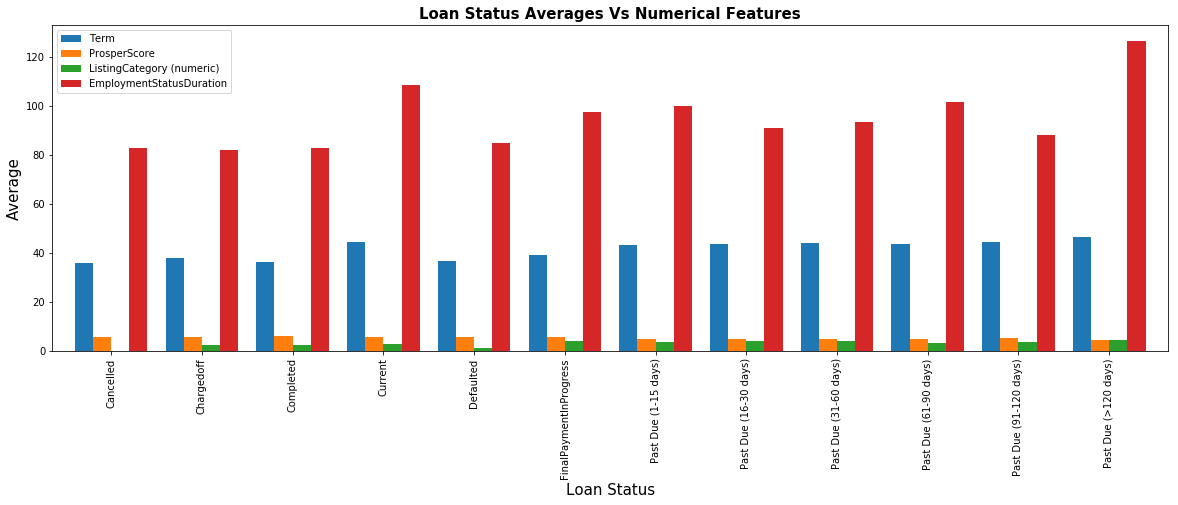

In [81]:
# Plot bar graph for the grouped features above
grouped_bar(df_2_copy);

**Observation**
> From the graph above, it's evident that majority of the debtors had the loans past due with more that 120 days.

In [82]:
# Select the next numerical features
df_3 = new_df[numerical_features].iloc[:, 5:10]

# add the loan status
df_3['LoanStatus'] = new_df['LoanStatus']
df_3.head()

,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,LoanStatus
0,5.000,4.000,12.000,1,24.000,Completed
1,14.000,14.000,29.000,13,389.000,Current
2,10.317,9.260,3.000,0,0.000,Completed
3,5.000,5.000,29.000,7,115.000,Current
4,19.000,19.000,49.000,6,220.000,Current


In [83]:
# Group the above features by loan status and find their mean
df_3_copy = df_3.groupby(['LoanStatus']).mean()
df_3_copy

,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment
LoanStatus,,,,,
Cancelled,10.054,8.808,21.751,1.000,22.600
Chargedoff,9.012,7.901,24.596,5.575,308.545
Completed,9.766,8.546,25.404,6.294,328.028
Current,10.963,10.049,28.156,7.849,470.338
Defaulted,10.532,9.200,26.141,5.646,344.724
FinalPaymentInProgress,10.244,9.322,27.439,7.298,412.732
Past Due (1-15 days),9.922,8.762,27.578,6.511,366.887
Past Due (16-30 days),10.540,9.566,28.487,7.208,428.442
Past Due (31-60 days),9.562,8.691,27.361,6.457,352.303


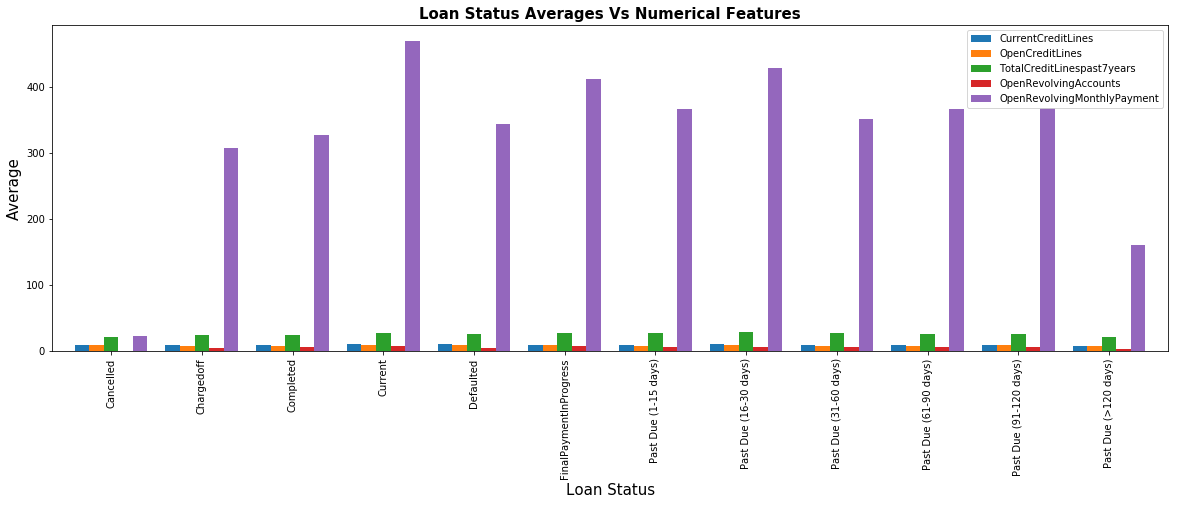

In [84]:
# Plot bar graph for the grouped features above
grouped_bar(df_3_copy);

**Observation**
> Over 500 debtors with Open Revolving Monthly Payment had existing/current loan. Only 150 who had open revolving monthly payment had loans that were past due with over 120 days. Those who had the lowest number of revolving monthly payment had their loans cancelled.

In [85]:
# Selecting the next numerical features
df_4 = new_df[numerical_features].iloc[:, 10:15]

# adding the loan status
df_4['LoanStatus'] = new_df['LoanStatus']
df_4.head()

,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,TotalTrades,LoanStatus
0,2.000,472.000,4.000,0.000,11.000,Completed
1,0.000,0.000,0.000,3989.000,29.000,Current
2,1.000,984.507,0.000,17598.707,23.230,Completed
3,4.000,10056.000,14.000,1444.000,26.000,Current
4,0.000,0.000,0.000,6193.000,39.000,Current


In [86]:
# find the mean
df_4_copy = df_4.groupby(['LoanStatus']).mean()
df_4_copy

,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,TotalTrades
LoanStatus,,,,,
Cancelled,2.518,787.606,3.093,14216.165,21.584
Chargedoff,1.379,1435.133,6.003,14412.063,20.755
Completed,0.596,905.977,3.929,15963.126,22.176
Current,0.293,912.890,3.733,19275.783,24.458
Defaulted,2.089,1130.669,5.942,19556.410,23.472
FinalPaymentInProgress,0.380,1108.088,3.737,21099.512,23.385
Past Due (1-15 days),0.490,1062.919,4.931,15138.132,23.077
Past Due (16-30 days),0.626,1554.053,5.083,19201.823,23.581
Past Due (31-60 days),0.559,2247.452,5.174,14400.047,22.449


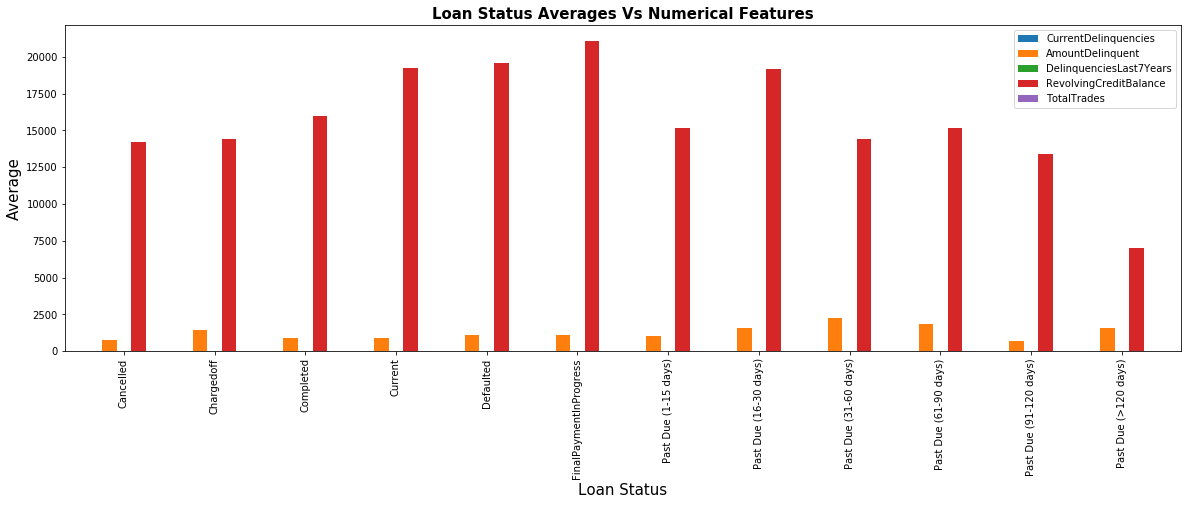

In [87]:
# plot the bar
# y_ticks = [0, 3, 5, 8, 10, 12, 15, 18, 20, 23, 25, 30, 35, 40, 60, 80, 100,
#            120, 300, 600, 800, 1000,5000,7500,12500,14000,15000,20000]
# plt.yticks(y_ticks)
grouped_bar(df_4_copy);

In [88]:
# Select the next features
df_5 = new_df[numerical_features].iloc[:, 15:21]

# add the loan status
df_5['LoanStatus'] = new_df['LoanStatus']
df_5.head()

,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,LoanCurrentDaysDelinquent,Recommendations,LoanStatus
0,0.810,0.000,0.170,3083.333,0,0,Completed
1,1.000,2.000,0.180,6125.000,0,0,Current
2,0.886,0.802,0.060,2083.333,0,0,Completed
3,0.760,0.000,0.150,2875.000,0,0,Current
4,0.950,2.000,0.260,9583.333,0,0,Current


In [89]:
df_6 = new_df[numerical_features].iloc[:, 18:19]
df_6['LoanStatus'] = new_df['LoanStatus']
df_6.head()

,StatedMonthlyIncome,LoanStatus
0,3083.333,Completed
1,6125.000,Current
2,2083.333,Completed
3,2875.000,Current
4,9583.333,Current


#### 2. What's the Distribution of the Variables?

> To find out the distribution of the variables, I'll plot histograms for the numeric features.

In [90]:
# creat a function for ploting the histogram
def hist_func(column):
    # Plot the listing category histogram
    plt.figure(figsize=[10,5])
    plt.hist(data = new_df, x = column, bins = bins)
    plt.title('{} Distribution'.format(column), weight='bold')
    plt.ylabel('Count')
    plt.xticks(bins)
    plt.xlabel(column);

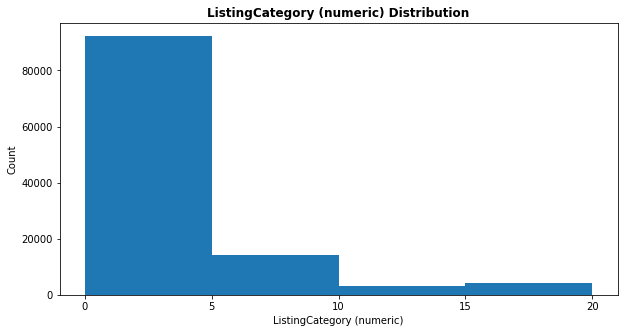

In [91]:
# Set the bin size 
bins = np.arange(0, new_df['ListingCategory (numeric)'].max()+5, 5)

# Plot the listing category histogram

hist_func('ListingCategory (numeric)')

**Observation**
> From the histogram above, over 9,000 listing category fall between the range of 0.0 to 5.0. This is by use of 5 bins. Having 20 diffrent categories, I'll group the each category into their own bin so that we see which category had the highest number of debtors.

#### 3. Which Loan Category had the highest number of Debtors?

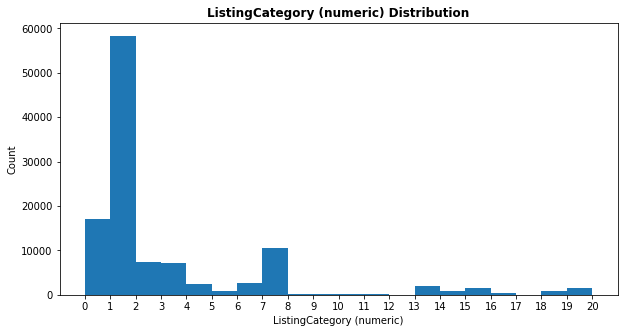

In [92]:
# set the bin size to 1
bins = np.arange(0, new_df['ListingCategory (numeric)'].max()+1, 1)

# plot the listing category histogram
hist_func('ListingCategory (numeric)')

**Observation**
> From the listing category histogram, it's noted that the 1 category which was home improvement had the highest number of debtors.

#### 4. What's the Distribution of Borrowers Rate?

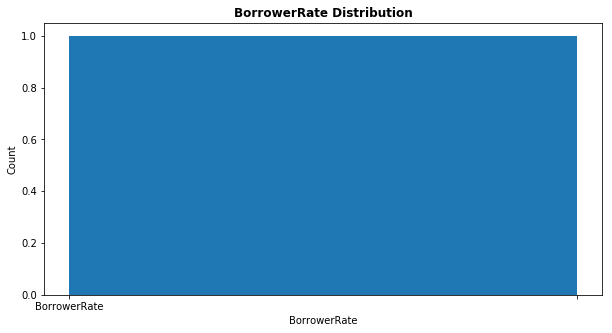

In [93]:
# set the bin size to 1
bins = np.arange(0, df['BorrowerRate'].max()+1, 1)

# plot the listing category histogram
hist_func('BorrowerRate')

**Observation**
> From the Borrowers Rate histogram above, the distribution is not well defined. I'll reduce the bin size and plot the graph using the new defined bin size.

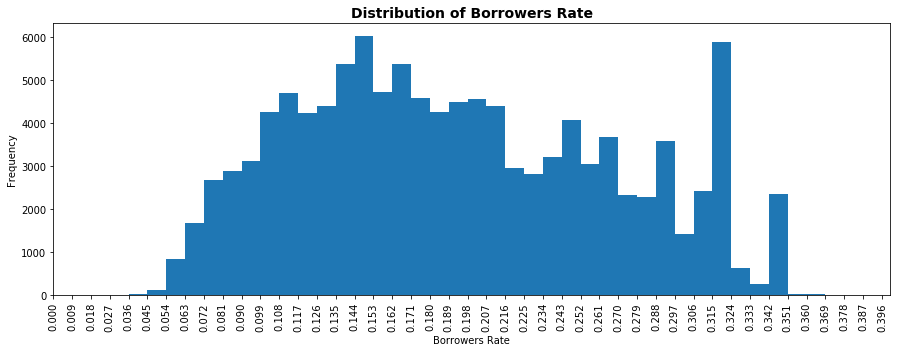

In [108]:
# Plot the Borrowers rate Histogram
# Set the diagram size
plt.figure(figsize=[15,5])

# define the bin size
bin_size = np.arange(0, df['BorrowerRate'].max()+0.009, 0.009)

# plot the histogram
df['BorrowerRate'].plot(kind='hist', bins = bin_size, xticks=bin_size)
plt.xlim(0,0.4) # set the limit on the x axis
plt.xticks(rotation=90)
plt.title('Distribution of Borrowers Rate', weight='bold', fontsize=14)
plt.xlabel('Borrowers Rate');


**Observation**
> Majority of the borrowers took loans with the rate of 0.144 followed by 0.315.

### Create a Function For Plotting Histogram

In [109]:
def hist_function(data, column_name):
    """
    This function will take in two arguments (data and column name)
    and return a histogram plot.
    Arguments: data=pd.DataFrame, column name
    INPUTS: 
    bins: will be an array of tha specific column values
    histogram function: plt.hist()
    title: plt.title(), which will have the column name
    ylabel and xlabel
    OUTPUT:
    return: histogram using plt.show()
    """
    # Set the bins to the max value of the column
    bins = np.arange(0, data[column_name].max()+3, 3)
    
    # plot the histogram
    plt.figure(figsize=[10,5])
    plt.hist(data = data, x = column_name, bins = bins)
    plt.xticks(np.arange(0, data[column_name].max()+3, 3))
    plt.title('{} Distirbution'.format(column_name), weight='bold')
    plt.ylabel('Count'), plt.xlabel(column_name)
    return plt.show()
    

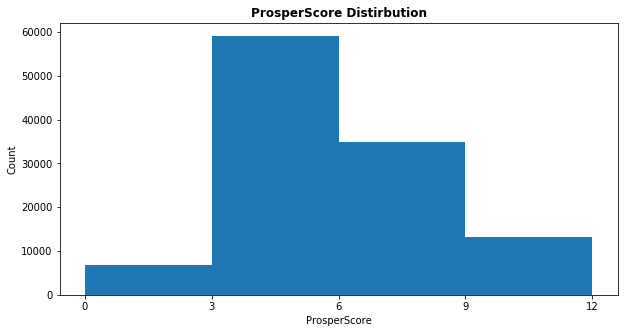

In [110]:
# plot ProsperScore Distribution
hist_function(new_df, 'ProsperScore')

**Observation**
> The prosper score ranges from 0 to 12. Nearly 60,000 debtors had a prosper score of between 3 to 6 followed by aroung 35,000 debtors who had a prosper score that ranged between 6 and 9. 

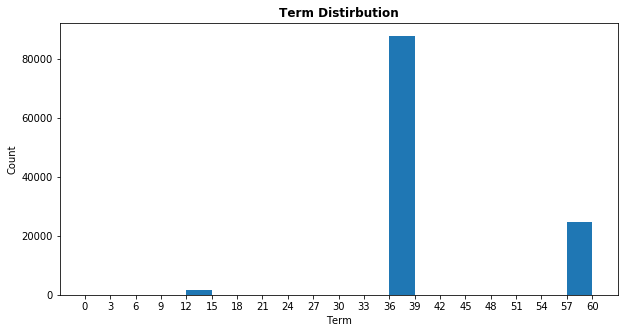

In [111]:
# Term histogram
hist_function(new_df, 'Term')

**Observation**
> The term that had a high number of debtors was 36 terms.

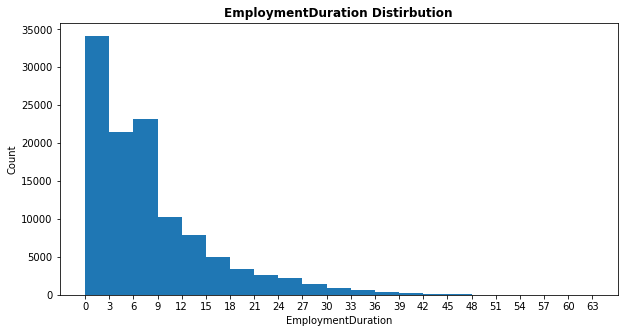

In [112]:
# Plot histogram for Employment Duration
hist_function(new_df, 'EmploymentDuration')

**Observation**
> From the employment histogram above, it indicates that 34,000 debtors had been employed for three years then nearly 23,000 of them had been in employment for nine years.

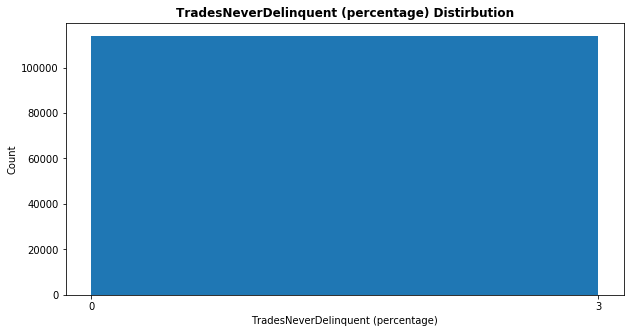

In [113]:
# Plot the histogram for Trades that were never Delinquent
hist_function(new_df, 'TradesNeverDelinquent (percentage)')

**Observation**
> The figure above doesn't show clearly the distribution of the trades that were never deliquent. The function used for this graph had a bin of 3 interval. I'll plot the graph with a different function and use a smaller bin size. To determine the bin size, I'll check the values in the Trades Never Deliquent.

In [114]:
# Preview the values in Trades Never Deliquent
new_df['TradesNeverDelinquent (percentage)'][:10]

0   0.810
1   1.000
2   0.886
3   0.760
4   0.950
5   1.000
6   0.680
7   0.800
8   1.000
9   1.000
Name: TradesNeverDelinquent (percentage), dtype: float64

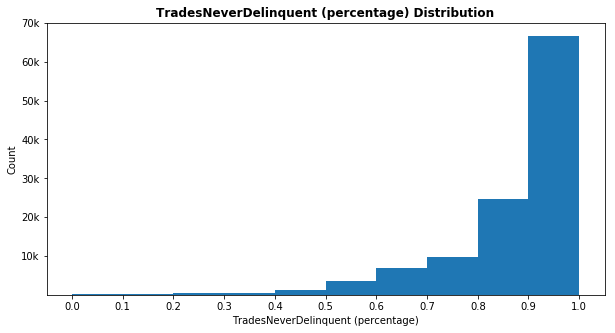

In [199]:
# Set the bins for the Trade Never Deliquent
bins = np.arange(0, new_df['TradesNeverDelinquent (percentage)'].max()+0.1, 0.1)

# Plot the histogram for Trades that were never Delinquent
hist_func('TradesNeverDelinquent (percentage)'), plt.yticks([10000, 20000,30000,40000,50000,60000, 70000],
                                                            ['10k', '20k', '30k', '40k', '50k', '60k', '70k']);

**Observation**
> From the above chart, the distribution is not well displayed. I'll therefore change the values to integers by multiplying by 100 but before then, I'll check the unique values first.

In [116]:
# Check the unique values for TradesNeverDelinquent (percentage)
# print first 20 values
print('\033[1m The first 20 unique values for TradesNeverDeliquent (percentage) column are:\033[0m')
new_df['TradesNeverDelinquent (percentage)'].unique()[:20]

 The first 20 unique values for TradesNeverDeliquent (percentage) column are:


array([ 0.81      ,  1.        ,  0.88589719,  0.76      ,  0.95      ,
        0.68      ,  0.8       ,  0.72      ,  0.4       ,  0.94      ,
        0.84      ,  0.37      ,  0.91      ,  0.97      ,  0.6       ,
        0.96      ,  0.92      ,  0.75      ,  0.87      ,  0.9       ])

In [117]:
# Find the minimum and maximum value for TradesNeverDelinquent (Percentage)
max_value = new_df['TradesNeverDelinquent (percentage)'].max()
min_value = new_df['TradesNeverDelinquent (percentage)'].min()
print('The max value for TradesNeverDelinquent (percentage) is {} and the minimum value is {}'.format(max_value, min_value))

The max value for TradesNeverDelinquent (percentage) is 1.0 and the minimum value is 0.0


**Observation**
> From the above output, the maximum and minimum values for TradesNeverDelinquent (percentage) are 1 and 0 respectively. I'll therefore multiply this values by 100 to get their full values in integer format for ease of visualizing their distribution.

In [118]:
# Create a new column named TradesNeverDelinquent
new_df['TradesNeverDelinquent'] = new_df['TradesNeverDelinquent (percentage)']*100

# Preview the new column
new_df['TradesNeverDelinquent'].head(3)

0    81.000
1   100.000
2    88.590
Name: TradesNeverDelinquent, dtype: float64

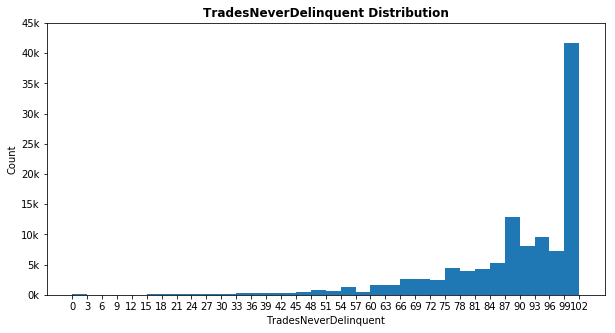

In [227]:
# Plot the TradesNeverDelinquent Distribution
bins = np.arange(0, new_df['TradesNeverDelinquent'].max()+3, 3)

# Use the histogram function created initially to plot the graph
hist_func('TradesNeverDelinquent'), plt.yticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000],
                                                           ['0k','5k', '10k', '15k', '20k', '25k', '30k', '35k', '40k', '45k']);

**Observation**
> From the above diagram, there were over 40000 trades with a percentage range of between 99% to 100% percent that were never delinquent.

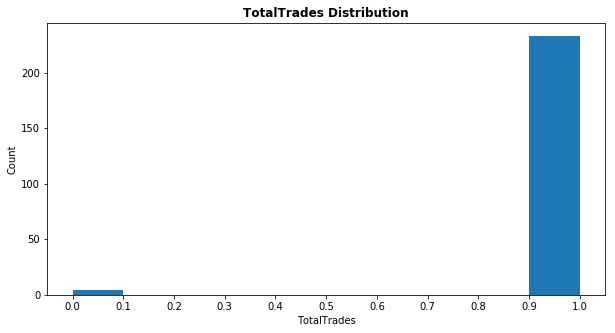

In [122]:
# Total trades Histogram plot 
hist_func('TotalTrades')

**Observation**
> From the above chart, the Total Trades distribution is not clearly defined. I'll check the minimum and maximum value and set the bins then plot the histogram for the Total Trades.

In [120]:
# Total Trades Minimum value
new_df['TotalTrades'].min()

0.0

In [121]:
# Total Trades Maximum value
new_df['TotalTrades'].max()

126.0

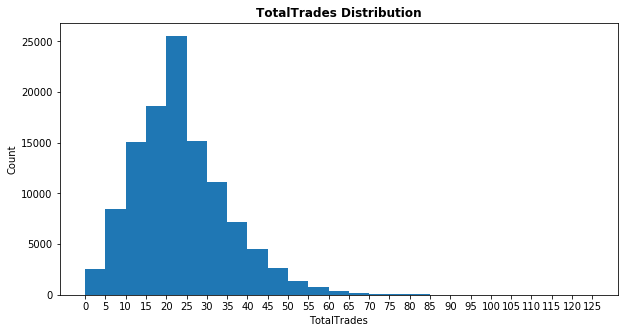

In [231]:
# Set the Total Trades bins with an interval of 5
bins = np.arange(0, new_df['TotalTrades'].max()+1, 5)
hist_func('TotalTrades')

**Observation**
> The histogram chart above indicates that majority of the total trades ranged between values of 20 to 25 with a frequency of 25,000.

In [123]:
# Preview the first 3 rows of the dataframe
new_df.head(3)

,CreditGrade,Term,LoanStatus,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,Recommendations,EmploymentDuration,TradesNeverDelinquent
0,C,36,Completed,Missing,5.950,0,CO,Other,Self-employed,2.000,True,True,2007-08-26 18:41:46.780000000,640.000,2001-10-11 00:00:00,5.000,4.000,12.000,1,24.000,2.000,472.000,4.000,0.000,11.000,0.810,0.000,0.170,"$25,000-49,999",3083.333,0,0,0.167,81.000
1,Missing,36,Current,A,7.000,2,CO,Professional,Employed,44.000,False,False,2014-02-27 08:28:14,680.000,1996-03-18 00:00:00,14.000,14.000,29.000,13,389.000,0.000,0.000,0.000,3989.000,29.000,1.000,2.000,0.180,"$50,000-74,999",6125.000,0,0,3.667,100.000
2,HR,36,Completed,Missing,5.950,0,GA,Other,Not available,96.072,False,True,2007-01-02 14:09:10.060000000,480.000,2002-07-27 00:00:00,10.317,9.260,3.000,0,0.000,1.000,984.507,0.000,17598.707,23.230,0.886,0.802,0.060,Not displayed,2083.333,0,0,8.006,88.590


## 4.0 Bivariate Exploration

> This section willinvestigate relationships between pairs of variables in the
data. 

#### 1. What is the Relationship Between Loan Status and Listing Category?

In [259]:
# Create a scatter plot function
def scatter_func(num_var, cat_num_var):
    # Define the figure size
    plt.figure(figsize=(15,5))
    plt.scatter(y=new_df[num_var], x=new_df[cat_num_var])
    plt.title('Relation Between {} and {}'.format(num_var, cat_num_var), weight='bold', fontsize=12)
    plt.xticks(rotation=90)
    plt.xlabel(cat_num_var)
    plt.ylabel(num_var);
    

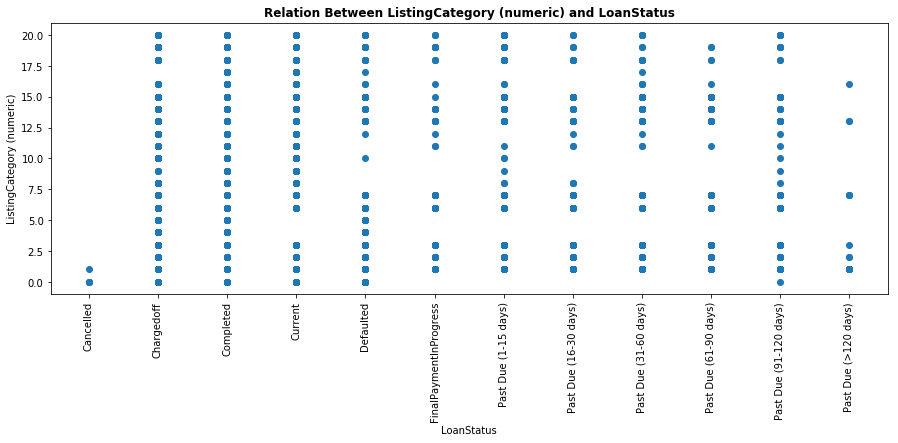

In [260]:
# Plot a scatter plot Loan Status and Listing Category
# Define the figure size
scatter_func('ListingCategory (numeric)', 'LoanStatus')

**Observation**
> The scatter plot above shows no correlation between the Loan Status and the Listing Category.

#### 2. What's the Relationship Between Loan Status and Category Listing

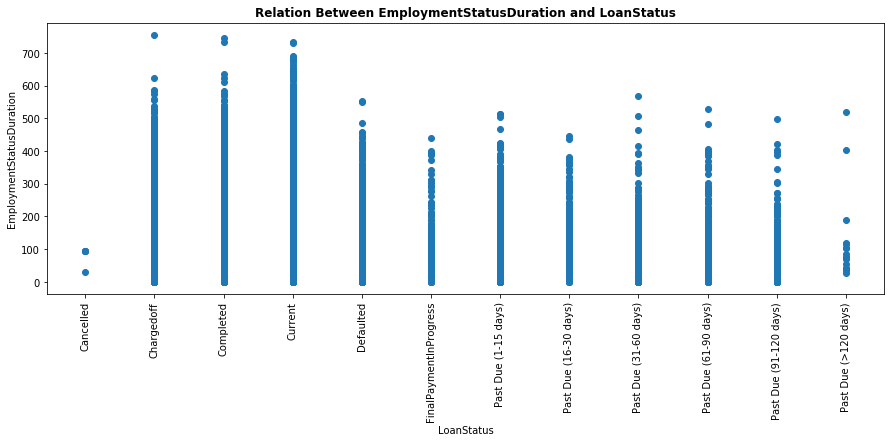

In [261]:
# Plot a scatter plot for 'LoanStatus' vs Listing Category
# plt.scatter(x=new_df['ListingCategory (numeric)'], y=new_df['LoanStatus'])
# plt.xticks(rotation=90);
scatter_func('EmploymentStatusDuration', 'LoanStatus' )

#### 3. Is there any Relation Between Loan Status and Listing Category

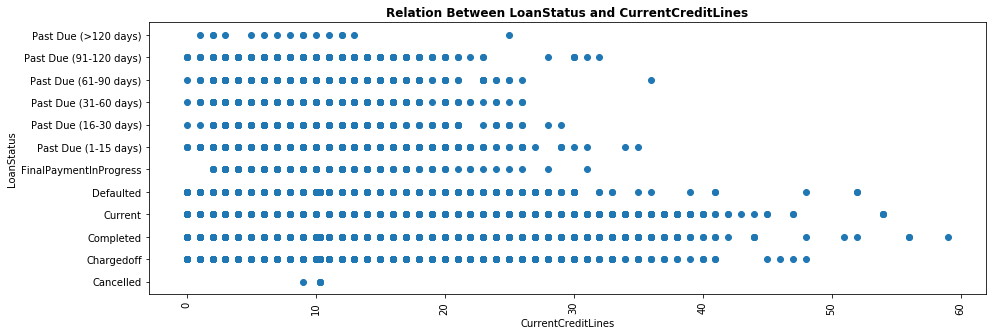

In [262]:
# Plot a scatter plot for 'LoanStatus' vs CurrentCreditLines
scatter_func('LoanStatus', 'CurrentCreditLines' )

**Observation**
> The above scatter plot indicates that there's no correlation between the loan status and the Listing category.

#### 4. Find out the Relationship Between Loan Status and Delinquencies Last 7 Years 

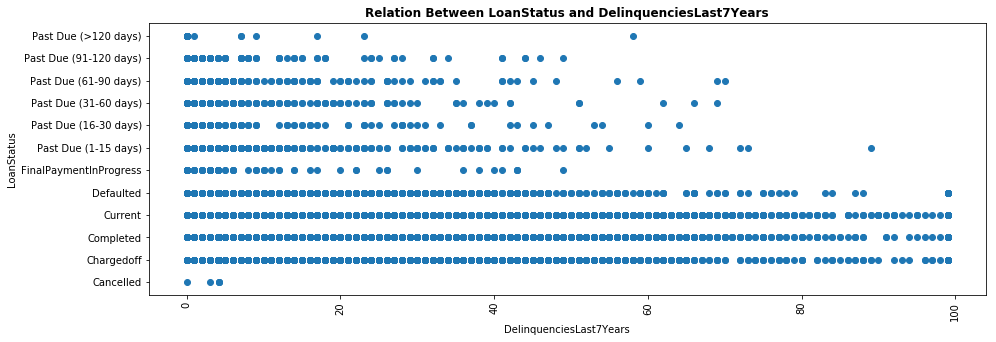

In [263]:
# Plot a scatter plot for 'LoanStatus' vs Delinquencies Last 7 Years
scatter_func('LoanStatus', 'DelinquenciesLast7Years' )

#### 5. What is the Relation Between Loan Status and Debt to income Ratio

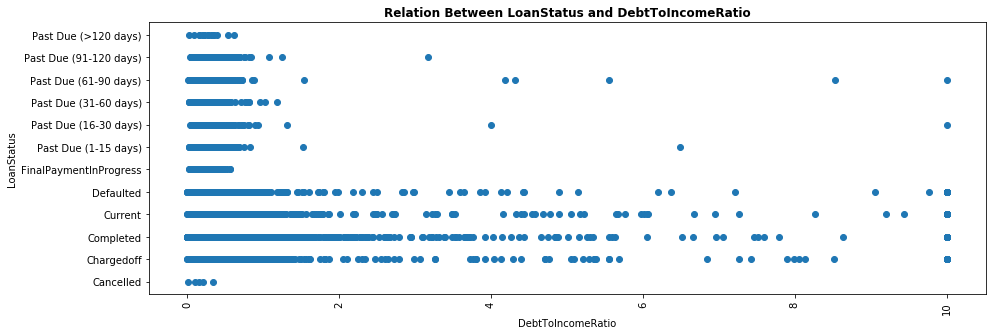

In [264]:
# Plot a scatter plot for 'LoanStatus' vs Debt to Income Ratio
scatter_func('LoanStatus', 'DebtToIncomeRatio' )

**Observation**
> The diagram above indicates no correlation between the loan status and Debt to income Ration.

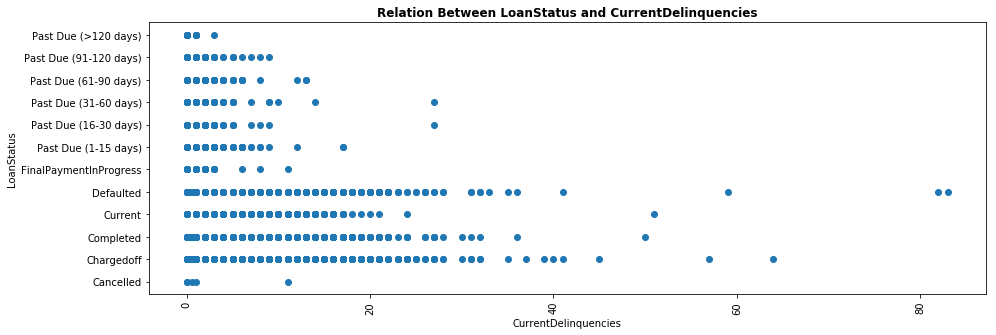

In [265]:
# Plot a scatter plot for 'LoanStatus' vs CurrentDelinquencies
scatter_func('LoanStatus', 'CurrentDelinquencies' )

**Observation**
> There is no correlation between the Loan Status and Listing Category

#### 6. What's the Certainity of Monthly Income Vs the Monthly Employment Duration?
> I'll use the error bar to try and find out the certainity or uncertainity of Monthly Income against the Monthly Employment Status Duration.

In [126]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0, 755+100, 100)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(new_df['EmploymentStatusDuration'], bin_edges, include_lowest = True)
displ_binned.head()

0    (-0.001, 100.0]
1    (-0.001, 100.0]
2    (-0.001, 100.0]
3     (100.0, 200.0]
4    (-0.001, 100.0]
Name: EmploymentStatusDuration, dtype: category
Categories (8, interval[float64]): [(-0.001, 100.0] < (100.0, 200.0] < (200.0, 300.0] < (300.0, 400.0] < (400.0, 500.0] < (500.0, 600.0] < (600.0, 700.0] < (700.0, 800.0]]

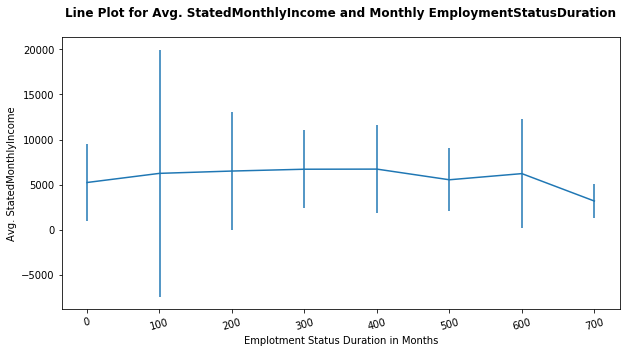

In [127]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = new_df['StatedMonthlyIncome'].groupby(displ_binned).mean()
comb_std = new_df['StatedMonthlyIncome'].groupby(displ_binned).std()

# Plot the summarized data
plt.figure(figsize=[10,5])
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.title('Line Plot for Avg. StatedMonthlyIncome and Monthly EmploymentStatusDuration\n', weight='bold')
plt.xticks(rotation=15);
plt.ylabel('Avg. StatedMonthlyIncome')
plt.xlabel('Emplotment Status Duration in Months');

**Observation**
> The error bar above indicates there's high uncertainity of Monthly income when the employment duration was 100 months. The uncertainity in monthly income tend to drop with 200 and 300 employment duration then raises with 400 employment duration. The certainity then drops with the employment duration of 500 months then raises again at 600 months duration. 

In [128]:
def statistics_rol_window(data, num_var1, num_var2):
    # compute statistics in a rolling window
    df_window = new_df.sort_values(num_var1).rolling(100)
    x_winmean = df_window.mean()[num_var1]
    y_median = df_window.median()[num_var2]
    y_q1 = df_window.quantile(.25)[num_var2]
    y_q3 = df_window.quantile(.75)[num_var2]

    # plot the summarized data
    base_color = sb.color_palette()[0]
    line_color = sb.color_palette('dark')[0]
    plt.scatter(data = new_df, x = num_var1, y = num_var2)
    plt.errorbar(x = x_winmean, y = y_median, c = line_color)
    plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
    plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

    plt.xlabel(num_var1)
    plt.ylabel(num_var2)
    return plt.show()

#### 7. What's the Distribution of Prosper Score if the Borrower is a Home Owner or Not?
I'll plot a histogram using facet grid to be able to establish the distribution of prosper score when the borrower is a home owner or not.

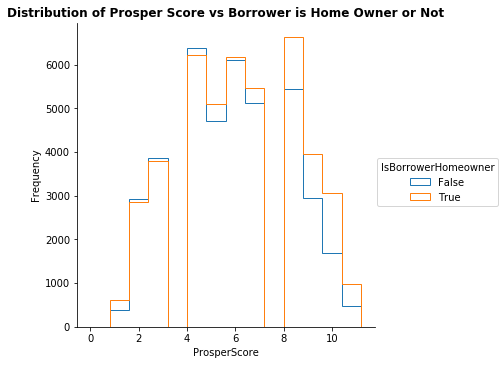

In [268]:
# set the bin sizes
bin_edges = np.arange(0, df['ProsperScore'].max()+0.8, 0.8)

# Plot the histogram on a facet grid
g = sb.FacetGrid(data = df, hue = 'IsBorrowerHomeowner', size = 5)
g.map(plt.hist, "ProsperScore", bins = bin_edges, histtype = 'step')
plt.title('Distribution of Prosper Score vs Borrower is Home Owner or Not', weight='bold')
plt.ylabel('Frequency')
g.add_legend();

**Observation**
> Majority (7000 home owners) of the loan borrowers were home owners with a high prosper score of 8. Those who didn't own a home with a similar prosper score were 5,300 borrowers.

#### 8. What was the Distribution of Total Trades Vs Loan Status?

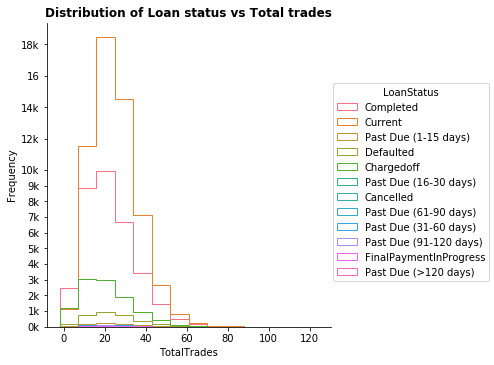

In [286]:
# set the bin sizes range
bin_edges = np.arange(-2, df['TotalTrades'].max()+0.5, 9)

# Plot the his using facetgrid
g = sb.FacetGrid(data = df, hue = 'LoanStatus', size = 5)
g.map(plt.hist, "TotalTrades", bins = bin_edges, histtype = 'step')
plt.title('Distribution of Loan status vs Total trades', weight='bold')
plt.ylabel('Frequency')
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 12000, 14000, 16000, 18000],
          ['0k', '1k', '2k', '3k', '4k', '5k', '6k', '7k', '8k', '9k', '10k', '12k', '14k', '16', '18k' ])
g.add_legend();

**Observation**
> A high number of borrowers who had current loan status had total trade of between 20 to 29. Those who defaulted had lower trade values.

#### 9. What is the Distribution of Prosper Score vs Loan Status?

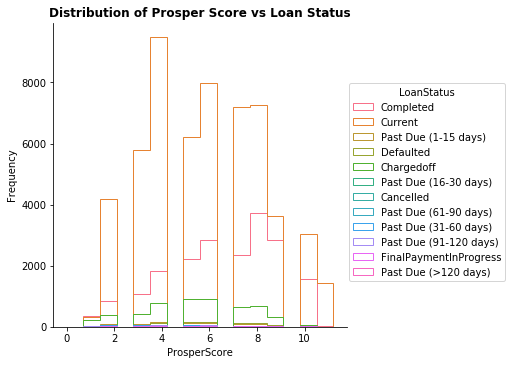

In [288]:
bin_edges = np.arange(0, df['ProsperScore'].max()+0.7, 0.7)
g = sb.FacetGrid(data = df, hue = 'LoanStatus', size = 5)
g.map(plt.hist, "ProsperScore", bins = bin_edges, histtype = 'step')
plt.title('Distribution of Prosper Score vs Loan Status', weight='bold')
plt.ylabel('Frequency')
g.add_legend();

In [72]:
# Bar chart function for plotting categorical and numerical features
def bar_chart(dataframe, column_1, column_2):
    plt.ylabel(column_2)
    return dataframe.groupby([column_1])[column_2].mean().plot(kind='bar', 
                                                               title='Count of {} Vs {}'.format(column_1, column_2),
                                                               color = sb.color_palette()[0],
                                                               );
    

#### 10. Which Loan status had the highest monthly income?

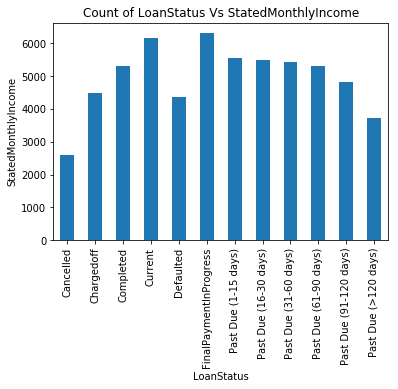

In [134]:
# Plot bar graph stated monthly income and Loan Status
bar_chart(df_6, 'LoanStatus', 'StatedMonthlyIncome');


**Observation**
> The borrowers with the highest average monthly income had their final loan payment in progress. Those with the second highest average monthly income had current loans. The ones who earned low income had their loans cancelled.

#### 11. Which loan Status had the highest borrowers rate?

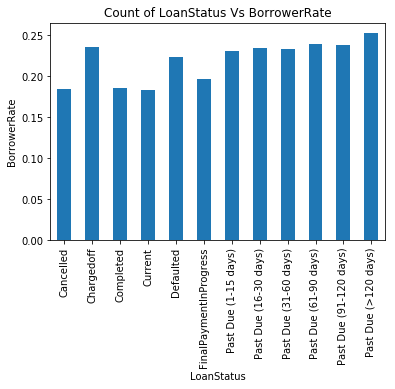

In [136]:
# Bar plot for Loan status and borrower rate
bar_chart(df, 'LoanStatus', 'BorrowerRate');

**Observation**
> It's noted from the bar chart above that the all the loan with past due, chargeoff and defaulted status had the highest borrowers rate of above 0.20. Those who had current loans or had completed paying their loans had interest rate of 0.8 and 0.7 respectively.

#### 12. Which loan status had the highest recommendations?

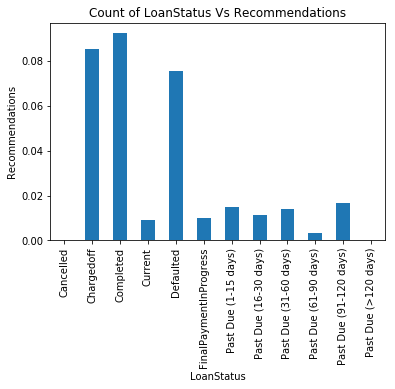

In [137]:
# Bar chart for Recommendations and Loan Status
bar_chart(new_df, 'LoanStatus', 'Recommendations');

**Obseravtion**
> The status with the highest recommendation score of 0.09 was had been paid fully with a loan status of completed.

#### 13. Which loan status had the highest repayment term?

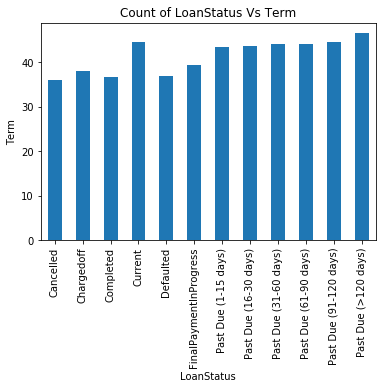

In [138]:
# bar plot for loan status vs term
bar_chart(new_df, 'LoanStatus', 'Term');

**Observation**
> All the past due loans had repayment terms of above 40 mponths.

#### 14. Which loan status had the highest Prosper Score?

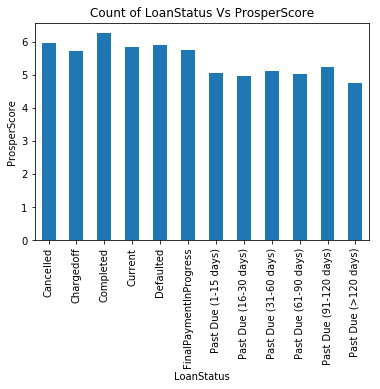

In [139]:
# Bar plot for Loan status and Prosper Score
bar_chart(new_df, 'LoanStatus', 'ProsperScore');

**Observation**
> The loans that were fully paid with the loan status as completed had the highest Prosper score of 6.3. All the past due loans had a prosper score of 5 to 5.3.

#### 15. Which loan status had the highest listing category?

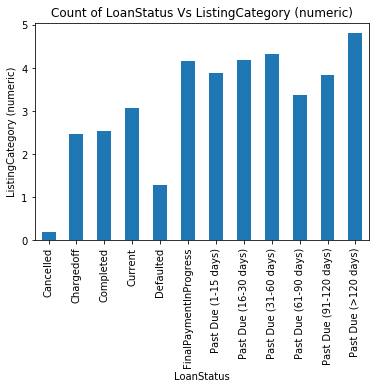

In [140]:
# Bar plot for Loan Status and Listing Category
bar_chart(new_df, 'LoanStatus', 'ListingCategory (numeric)');

**Observation**
> All the past due loan belonged to a listing category of above an average of 3. 

#### 16. Which loan status had the highest employment duration


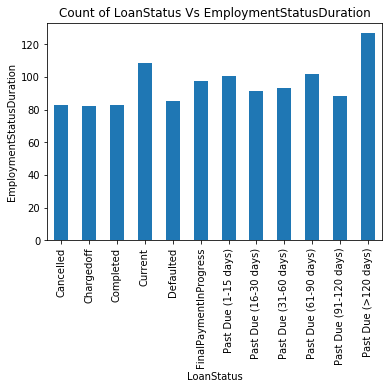

In [141]:
# bar plot loan status and employment duration
bar_chart(new_df, 'LoanStatus', 'EmploymentStatusDuration');

**Observation**
> All of the past due loans belonged to the borrowers that had more than 80 months duration in employment apart from the borrowers with current loans that had 110 employment duration status. 

#### 17. What's the loan status on the credit scores lower range?

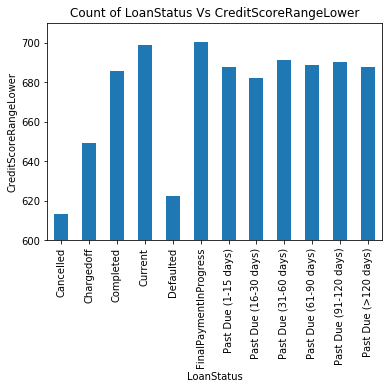

In [142]:
# Bar plot for Loan status and credit score lower range
bar_chart(new_df, 'LoanStatus', 'CreditScoreRangeLower'), plt.ylim(600, 710);

**Observation**
> The cancelled loans had the lowest credit score of 617 followed by defaulted loans with a credit range of 623. It's evident that the loans with the highest credit score range of above 697 performed well with a status of current andfinal payment in progress.

#### 18. Which loan status had he highest current credit lines?

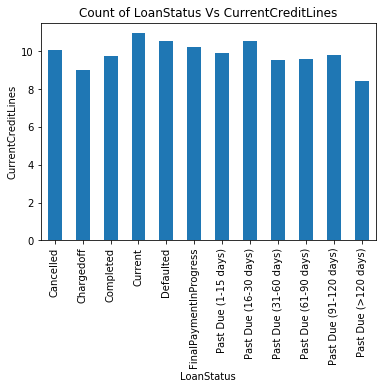

In [143]:
# Bar chart for loans status vs current credit lines
bar_chart(new_df, 'LoanStatus', 'CurrentCreditLines');

**Observation**
> The borrowers whi had current loans had the highest number of current credit lines of 11.

#### 19. Which loan status had the highest number of open credit lines?

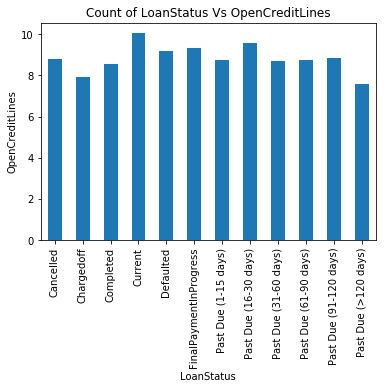

In [144]:
# Bar chart for loan status vs open credit lines
bar_chart(new_df, 'LoanStatus', 'OpenCreditLines');

**Observation**
> The borrowers with the current loans had the highest number of open credit lines.

#### 20. Which loan status had the highest number of open revolving accounts?

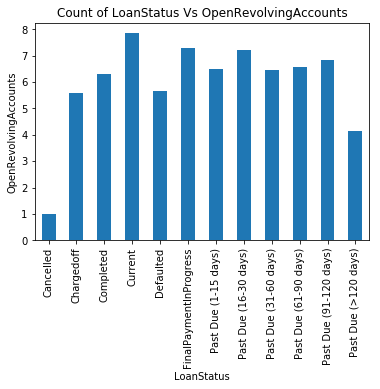

In [145]:
# bar plot for Loan Status vs open Revolving Accounts
bar_chart(new_df, 'LoanStatus', 'OpenRevolvingAccounts');

**Observation**
> The borrowers with the highest number of open revolving accounts had current loans. 

#### 21.Which loan status had the highest open revolving monthly payment?

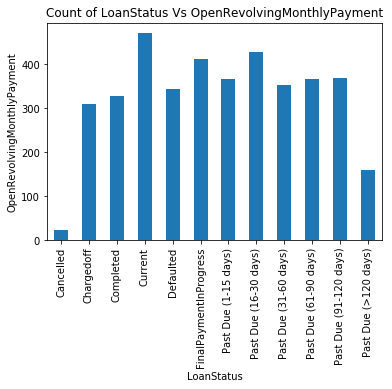

In [146]:
# Bar plot for 'LoanStatus', 'OpenRevolvingMonthlyPayment'
bar_chart(new_df, 'LoanStatus', 'OpenRevolvingMonthlyPayment');

**Observation**
> It is evident that borrowers with current loan had the highest open revolving amount.

#### 22. Which Loan Status had the highest Current Delinquencies values?

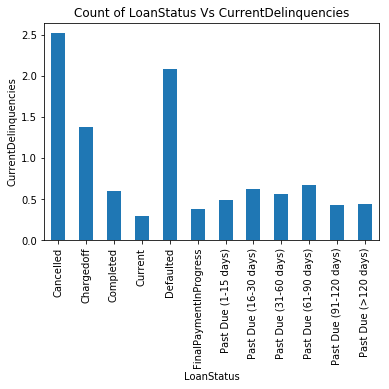

In [147]:
# Bar chart for 'LoanStatus' vs 'CurrentDelinquencies'
bar_chart(new_df, 'LoanStatus', 'CurrentDelinquencies');

**Observation**
> The borrowers with cancelled, defaulted and chargeoff loans had the highest number of deliquencies values of 2.5, 2.0 and 1.4 respectively. Those with current and completed loans had low delinduencies values.

#### 23. Identify the loan status with the highest Delinquent Amount.

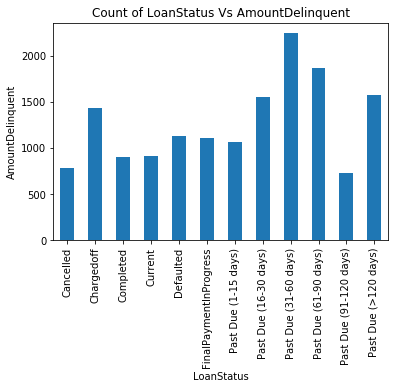

In [148]:
# Bar Chart for 'LoanStatus' Vs 'AmountDelinquent'
bar_chart(new_df, 'LoanStatus', 'AmountDelinquent');

**Observation**
> All the past due loans together with the chargeoff loans had high delinquent amounts.

### 24. Which loan status had the most number of delinquencies in years?

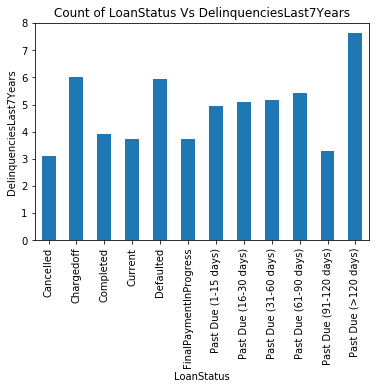

In [149]:
# bar chart for 'LoanStatus' vs 'DelinquenciesLast7Years'
bar_chart(new_df, 'LoanStatus', 'DelinquenciesLast7Years');

**Observation**
> The chargedoff, defaulted and nearly all of the past due loans were delinquent for over 4 years.

#### 25. Which loan status had the highest number of trades?

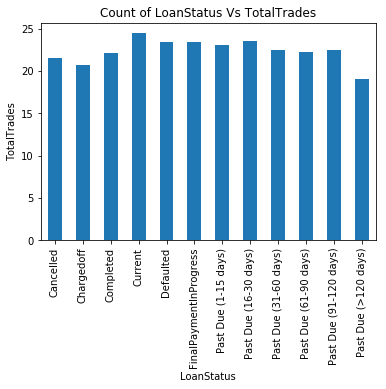

In [150]:
# Bar chart Loan Status Vs Total Trades
bar_chart(new_df, 'LoanStatus', 'TotalTrades');

**Observation**
> Borrowers with current loans seemed to have the highest number of total trades.

#### 26. Which loan status had the highest debt to income ratio

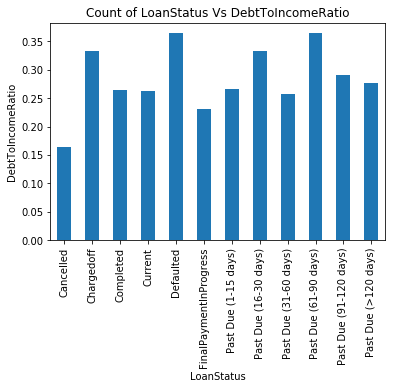

In [151]:
# Bar Chart 'LoanStatus', 'DebtToIncomeRatio'
bar_chart(new_df, 'LoanStatus', 'DebtToIncomeRatio');

**Observation**
> Loans with past due date of 61 to 90 days had the highest debt to income ration of 0.33 followed by defaulted loans with the ratio of 0.32.

#### 27. Which loan status had the highest amount of loan current days delinquent?

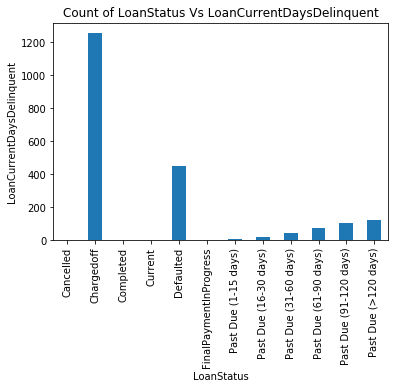

In [153]:
# Bar chart 'LoanStatus', 'LoanCurrentDaysDelinquent'
bar_chart(new_df, 'LoanStatus', 'LoanCurrentDaysDelinquent');

**Observation**
> The borrowers with chargedoff, defaulted and all past due loans had the loans in current delinquent with chargedoff having the highest value of 12,500.

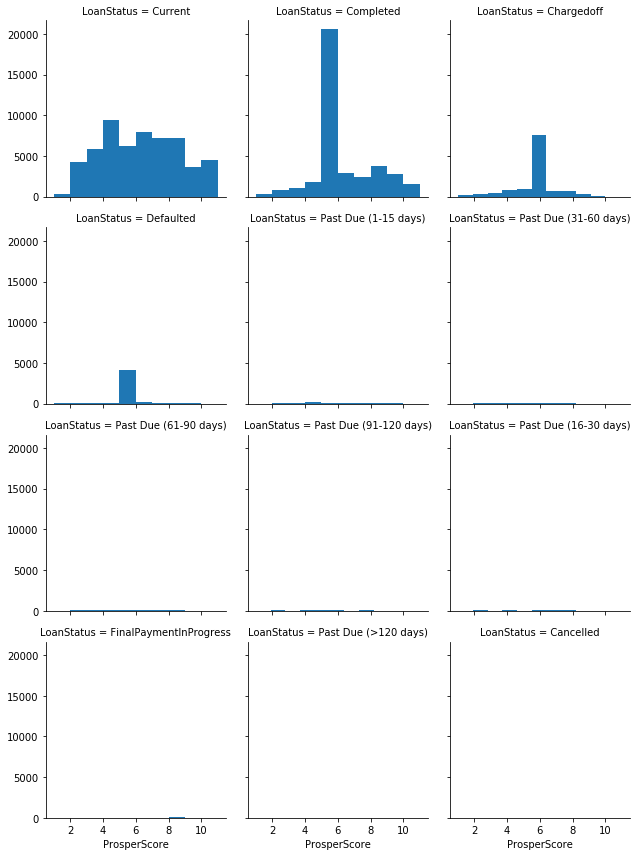

In [156]:
# distribution of Loan status per category vs prosper score
ordered_categories = new_df['LoanStatus'].value_counts().index
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_categories)
new_df['LoanStatus'] = new_df['LoanStatus'].astype(vclasses)

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = new_df, col = 'LoanStatus', col_wrap=3)
g.map(plt.hist, "ProsperScore");

## 5.0 Multivariate Exploration

> I'll create plots of three or more variables to investigate your data even
further. 

In [296]:
# Create a point plot function
def pointplot_(cat_var1, num_var, cat_var2):
    plt.figure(figsize=[20,7])
    ax = sb.pointplot(data = df, x = cat_var1, y = num_var, hue = cat_var2,
                  dodge = 0.3, linestyles = "")
    plt.title('Relation Between  {}, {} and {}\n'.format(cat_var1, num_var, cat_var2), weight='bold', fontsize=15)
    plt.xticks(rotation=90);

In [289]:
new_df.head(3)

,CreditGrade,Term,LoanStatus,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,Recommendations,EmploymentDuration,TradesNeverDelinquent
0,C,36,Completed,Missing,5.950,0,CO,Other,Self-employed,2.000,True,True,2007-08-26 18:41:46.780000000,640.000,2001-10-11 00:00:00,5.000,4.000,12.000,1,24.000,2.000,472.000,4.000,0.000,11.000,0.810,0.000,0.170,"$25,000-49,999",3083.333,0,0,0.167,81.000
1,Missing,36,Current,A,7.000,2,CO,Professional,Employed,44.000,False,False,2014-02-27 08:28:14,680.000,1996-03-18 00:00:00,14.000,14.000,29.000,13,389.000,0.000,0.000,0.000,3989.000,29.000,1.000,2.000,0.180,"$50,000-74,999",6125.000,0,0,3.667,100.000
2,HR,36,Completed,Missing,5.950,0,GA,Other,Not available,96.072,False,True,2007-01-02 14:09:10.060000000,480.000,2002-07-27 00:00:00,10.317,9.260,3.000,0,0.000,1.000,984.507,0.000,17598.707,23.230,0.886,0.802,0.060,Not displayed,2083.333,0,0,8.006,88.590


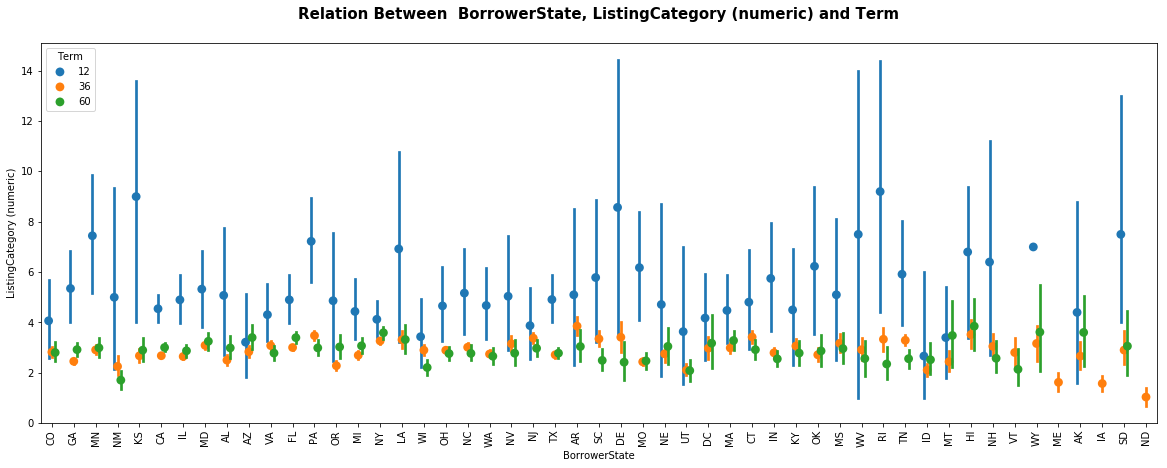

In [297]:
# Plot a point plot
pointplot_('BorrowerState','ListingCategory (numeric)', 'Term');

**Observation**
>Borrowers from the various states tend to apply for loans with loan term duration of 36 and 60 that are between the 2nd and 4th categories. The 12 month loan term durations are considered for average listing categories between 4 and 10.

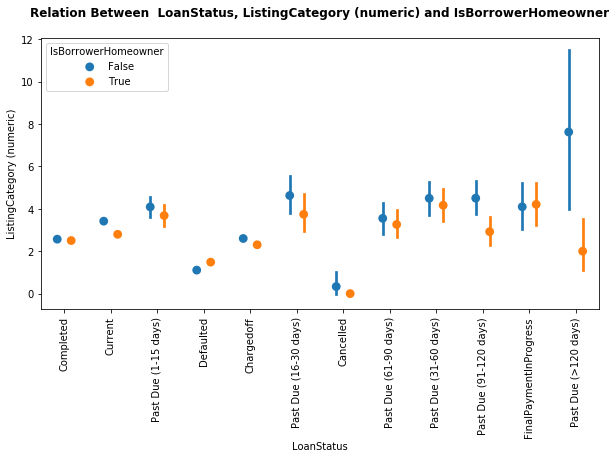

In [169]:
# Plot a point plot
pointplot_('LoanStatus','ListingCategory (numeric)','IsBorrowerHomeowner')

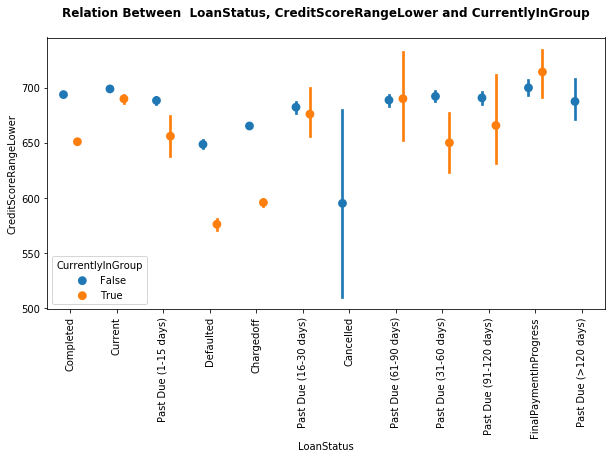

In [172]:
# Use the pointplot functio to plot 
pointplot_('LoanStatus', 'CreditScoreRangeLower', 'CurrentlyInGroup')

**Observation**
> Most borrowers tend to have less then 100 months of employment duration. Those with completed and current loan status have the employment duration stretch to above 700 months with income range of 25,000 to 49,999 dollars. Those who completed and current loan status with 620 to 630 of employment months duration had an income range of above 100,000 dollars.

#### What's the relation between Loan Status, Prosper Score and Term

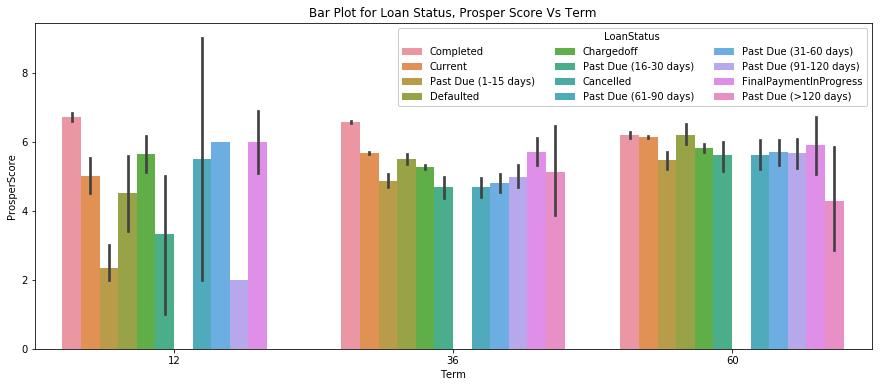

In [314]:
# Bar plot for Term, Prosper Score and Loan Status
plt.figure(figsize=[15,6])
ax = sb.barplot(data = df, x = 'Term', y = 'ProsperScore', hue = 'LoanStatus')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'LoanStatus')
plt.title('Bar Plot for Loan Status, Prosper Score Vs Term');

**Observation**
> Borrowers with high prosper score of above 6.2 tend to complete their loans as copared to those with a low prosper score of below 3. it's also noted that loans with a short repayment term are paid fully as compared with the ones with the longest repayment term of 60 months.

#### Relation Between Loan Status, Income Range and Prosper Score

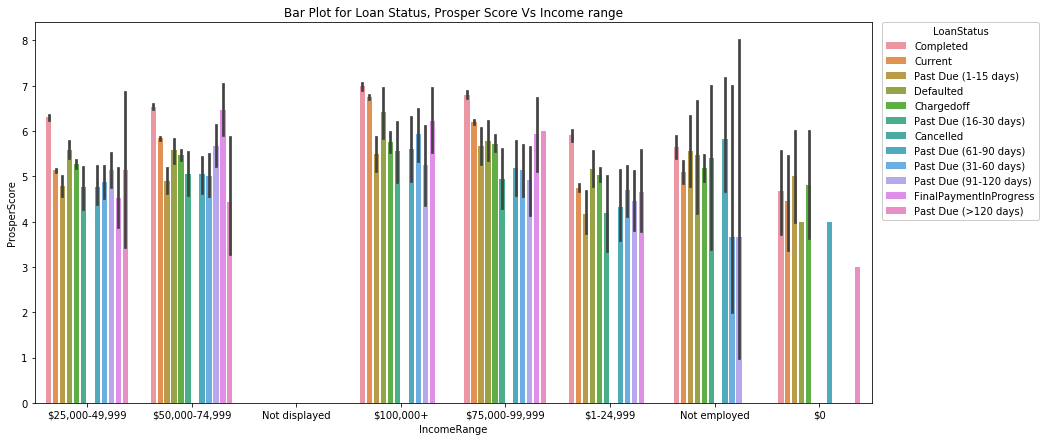

In [346]:
# Plot bar plot for Loan Status, Income Range and Prosper Score
# Define the plot size
plt.figure(figsize=[15,7])

# plot the bar
ax = sb.barplot(data = df, x = 'IncomeRange', y = 'ProsperScore', hue = 'LoanStatus')

# Use bbox_to_anchor and borderaxespad to set the legend outside the chart
ax.legend(bbox_to_anchor=(1.2, 1), loc = 'upper right', ncol = 1, framealpha = 1, title = 'LoanStatus', borderaxespad=0)
plt.title('Bar Plot for Loan Status, Prosper Score Vs Income range');

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .05)
plt.show();

**Observation**
> Borrowers with  high income range of over 100,000 dollars were able to complete paying their loans as compared to those with low income range of below 24,999 dollars. It's also noted that every income category has a loan that is either cancelled or past due. In every income range, those borrowers with the highest prosper score were also able to complete their loans payment.

#### What's the relation between Loan Status, Prosper Score and Recommendations?

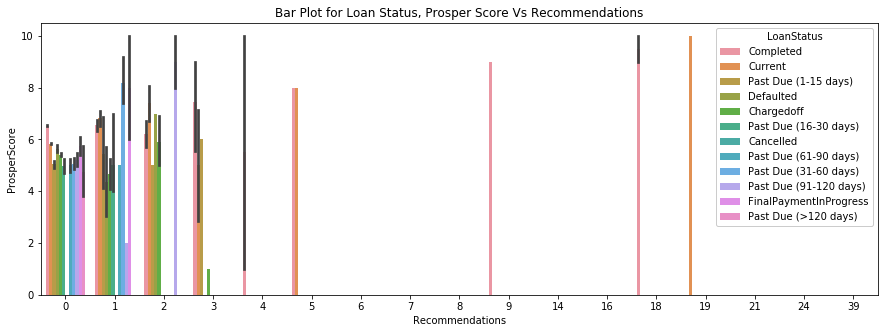

In [325]:
# Bar Plot for Loan Status, Prosper Score and Recommendations
plt.figure(figsize=[15,5])
ax = sb.barplot(data = df, x = 'Recommendations', y = 'ProsperScore', hue = 'LoanStatus')
plt.title('Bar Plot for Loan Status, Prosper Score Vs Recommendations');
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'LoanStatus')
#change_width(ax, .4)
plt.show();

**Observation**
> It's noted that borrowers who had high recommendation and prosper scores had current loans or completed paying their loans. Those with low recommendation and prosper scores had majority of their loans being past due, chargedoff or cancelled.

## 6.0 Exploratory Analysis

In [190]:
# Preview the dataframe
new_df.head(3)

,CreditGrade,Term,LoanStatus,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,Recommendations,EmploymentDuration,TradesNeverDelinquent
0,C,36,Completed,Missing,5.950,0,CO,Other,Self-employed,2.000,True,True,2007-08-26 18:41:46.780000000,640.000,2001-10-11 00:00:00,5.000,4.000,12.000,1,24.000,2.000,472.000,4.000,0.000,11.000,0.810,0.000,0.170,"$25,000-49,999",3083.333,0,0,0.167,81.000
1,Missing,36,Current,A,7.000,2,CO,Professional,Employed,44.000,False,False,2014-02-27 08:28:14,680.000,1996-03-18 00:00:00,14.000,14.000,29.000,13,389.000,0.000,0.000,0.000,3989.000,29.000,1.000,2.000,0.180,"$50,000-74,999",6125.000,0,0,3.667,100.000
2,HR,36,Completed,Missing,5.950,0,GA,Other,Not available,96.072,False,True,2007-01-02 14:09:10.060000000,480.000,2002-07-27 00:00:00,10.317,9.260,3.000,0,0.000,1.000,984.507,0.000,17598.707,23.230,0.886,0.802,0.060,Not displayed,2083.333,0,0,8.006,88.590


In [191]:
# Print the list of columns for plotting
new_df.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'DateCreditPulled',
       'CreditScoreRangeLower', 'FirstRecordedCreditLine',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'RevolvingCreditBalance', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome',
       'LoanCurrentDaysDelinquent', 'Recommendations', 'EmploymentDuration',
       'TradesNeverDelinquent'],
      dtype='object')

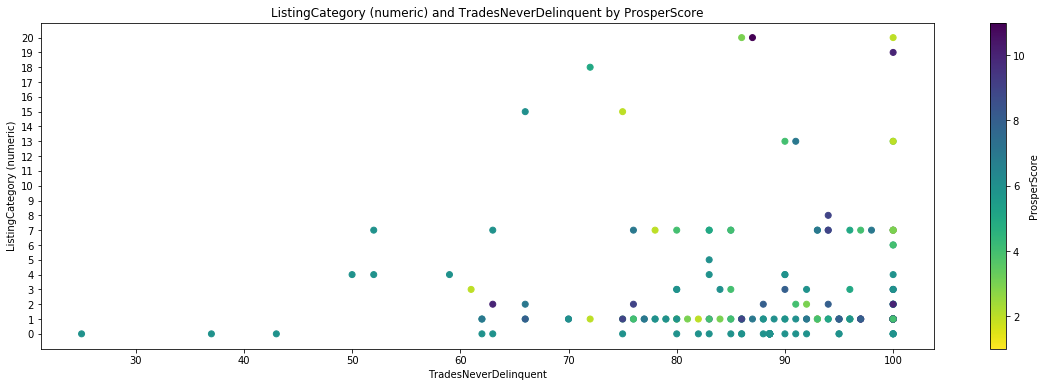

In [192]:
# loading in the data, sampling to reduce points plotted

np.random.seed(31017)
sample = np.random.choice(new_df.shape[0], 200, replace = False)
df_subset = new_df.loc[sample]

# plotting the data
plt.figure(figsize = [20,6])
plt.scatter(data = df_subset, x = 'TradesNeverDelinquent', y = 'ListingCategory (numeric)', c = 'ProsperScore',
            cmap = 'viridis_r')
plt.title('ListingCategory (numeric) and TradesNeverDelinquent by ProsperScore')
plt.xlabel('TradesNeverDelinquent')
plt.ylabel('ListingCategory (numeric)')
plt.yticks(np.arange(0, df_subset['ListingCategory (numeric)'].max()+1, 1))
plt.colorbar(label = 'ProsperScore');

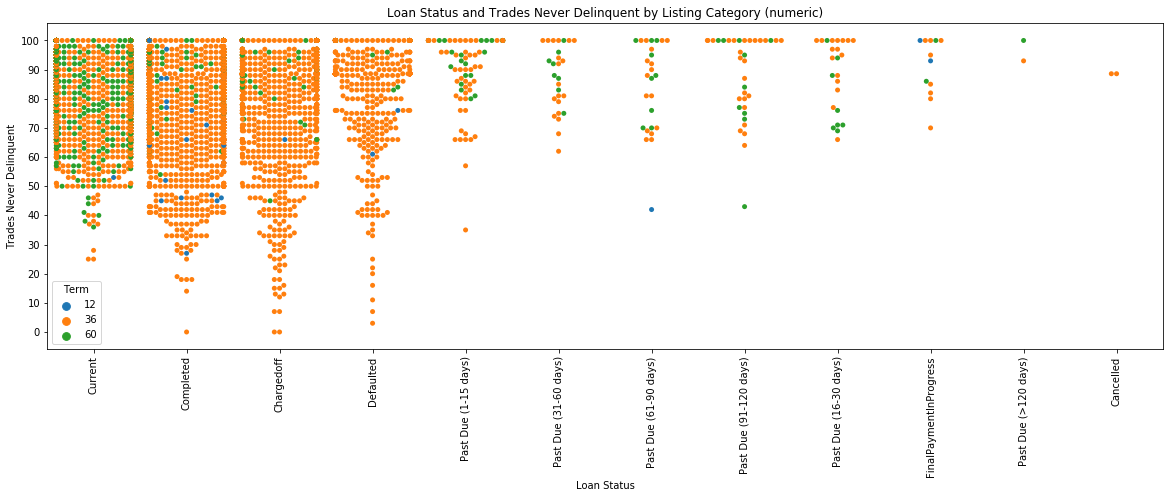

In [246]:
# loading in the data, sampling to reduce points plotted

np.random.seed(31017)
sample = np.random.choice(new_df.shape[0], 10500, replace = False)
df_subset = new_df.loc[sample]

# plotting the data
plt.figure(figsize = [20,6])
sb.swarmplot(x = 'LoanStatus', y = 'TradesNeverDelinquent',
             c = 'ListingCategory (numeric)',hue='Term', data=df_subset) # cmap = 'viridis_r' replace with hue
plt.title('Loan Status and Trades Never Delinquent by Listing Category (numeric)')
plt.xlabel('Loan Status')
plt.ylabel('Trades Never Delinquent')
plt.yticks(np.arange(0, df_subset['TradesNeverDelinquent'].max()+10, 10))
plt.xticks(rotation=90);
#plt.colorbar(label = 'Listing Category (numeric)'); # To be used alongside with cmap

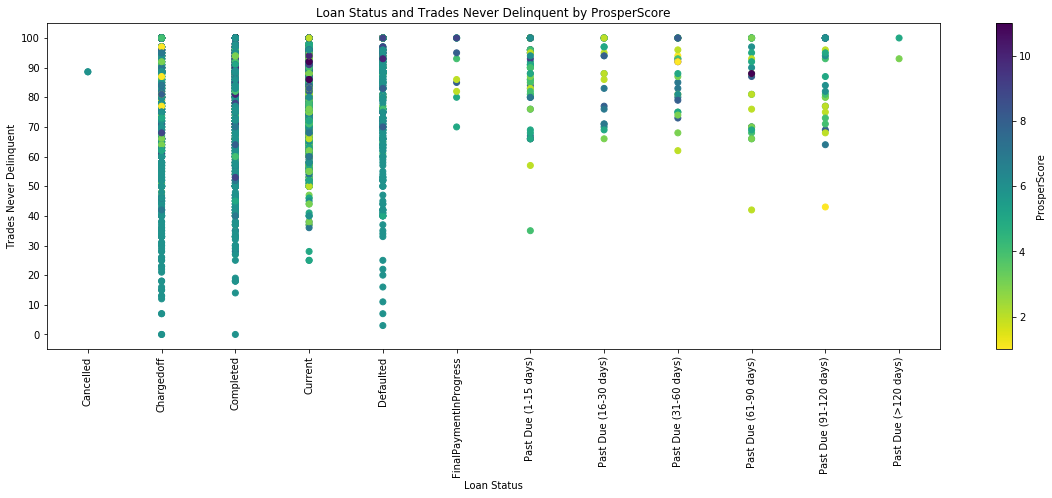

In [303]:
# loading in the data, sampling to reduce points plotted

np.random.seed(31017)
sample = np.random.choice(new_df.shape[0], 10500, replace = False)
df_subset = new_df.loc[sample]

# plotting the data
plt.figure(figsize = [20,6])
plt.scatter(data = df_subset, x = 'LoanStatus', y = 'TradesNeverDelinquent', c = 'ProsperScore',
            cmap = 'viridis_r')
plt.title('Loan Status and Trades Never Delinquent by ProsperScore')
plt.xlabel('Loan Status')
plt.ylabel('Trades Never Delinquent')
plt.yticks(np.arange(0, df_subset['TradesNeverDelinquent'].max()+10, 10))
plt.xticks(rotation=90);
plt.colorbar(label = 'ProsperScore');

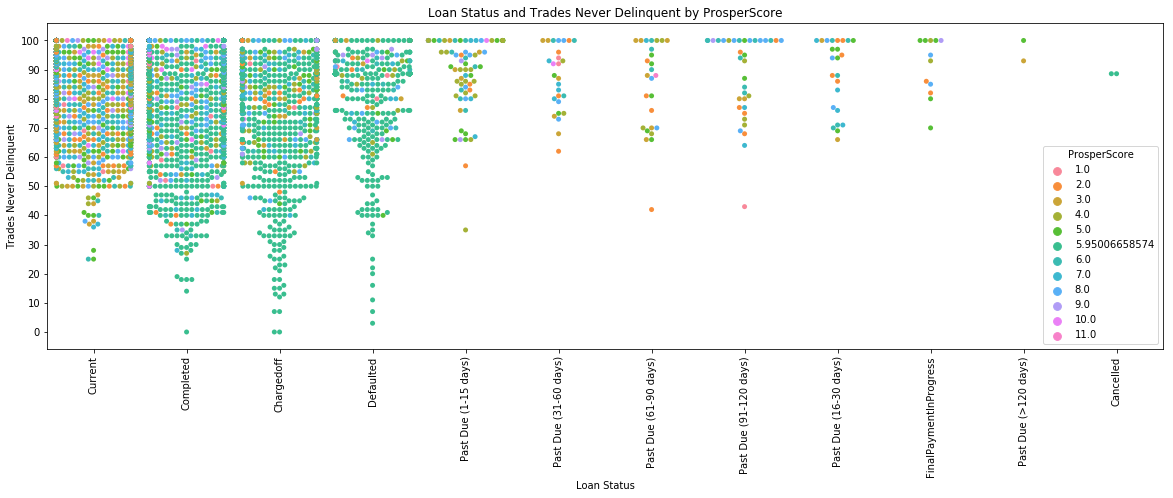

In [300]:
# loading in the data, sampling to reduce points plotted

np.random.seed(31017)
sample = np.random.choice(new_df.shape[0], 10500, replace = False)
df_subset = new_df.loc[sample]

# plotting the data
plt.figure(figsize = [20,6])
sb.swarmplot(data = df_subset, x = 'LoanStatus', y = 'TradesNeverDelinquent', hue = 'ProsperScore')#,
            #cmap = 'viridis_r')
plt.title('Loan Status and Trades Never Delinquent by ProsperScore')
plt.xlabel('Loan Status')
plt.ylabel('Trades Never Delinquent')
plt.yticks(np.arange(0, df_subset['TradesNeverDelinquent'].max()+10, 10))
plt.xticks(rotation=90);
#plt.colorbar(label = 'ProsperScore');

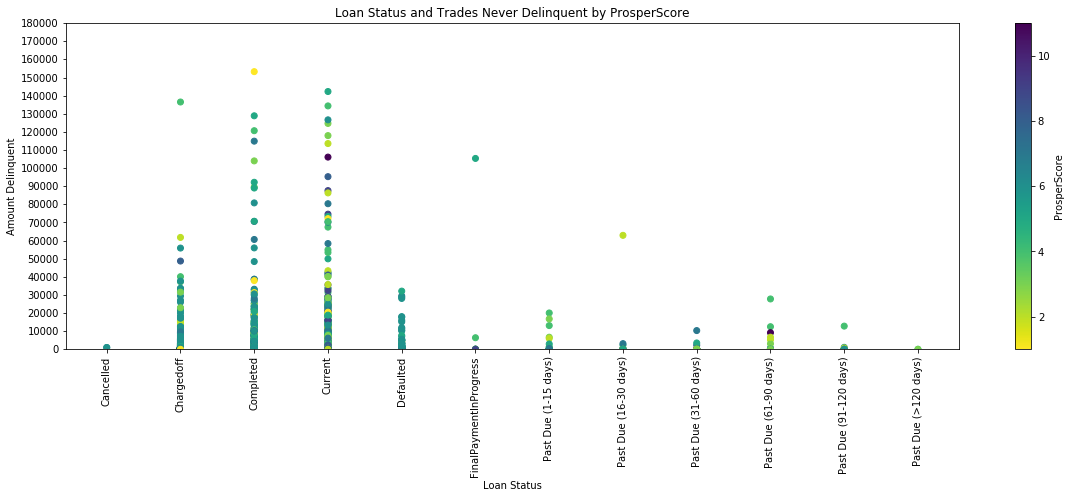

In [195]:
np.random.seed(31017)
sample = np.random.choice(new_df.shape[0], 10500, replace = False)
df_subset = new_df.loc[sample]

# plotting the data
plt.figure(figsize = [20,6])
plt.scatter(data = df_subset, x = 'LoanStatus', y = 'AmountDelinquent', c = 'ProsperScore',
            cmap = 'viridis_r')
plt.title('Loan Status and Trades Never Delinquent by ProsperScore')
plt.xlabel('Loan Status')
plt.ylabel('Amount Delinquent')
plt.yticks(np.arange(0, df_subset['AmountDelinquent'].max()+60000, 10000))
plt.xticks(rotation=90)
plt.ylim(0, 180000)
plt.colorbar(label = 'ProsperScore');